# Product Range Analysis Final Project 

Task Decompostion:
our goal for this project to analyze product range for e-commerce, in this project we will mark the most profitable items in the store.
according to Pareto Principle states that 80 percent of revenue comes from 20 percent of products in the store. 
that could help the company to focus in the strong selling products, and where they should pay attintion more, maybe the less selling products are low quality and because of that customers not getting back to buy them.

# Data overview and preprocessing
* overview data 
* deal with missing values and identify duplicate data
* transform data from one type to another
* checking the distribution of correlation matrix and check if we have outliers 
* categorize products. (according to the column StockCode we have 4070 items) 
* checking the most relevant data - maybe what was trendy product few months ago and now is not trendy anymore

# Analyze Products 
the main task here to investigate deeply the selling of our product:
* create revenue column for each transaction ( item price x quantatie)
* calculate the revenue for each category and report the most selling category and less selling category
* calculate how much we sell from each category 
* Average inventory sold per day per category
* Create a products dataset: include orders number, quantity and total revenue 
* calculate the average amount of purchases among the time 
* divide customers into segments according to average amount of money they spent in the store
* search for seasonal period that we had a peek in total purchase.
* check what the most common shopping cart consist of 

# Formulate and test statistical hypotheses
do the data show that the 80/20 “rule” perfectly apply to products in this dataset?<br>
is there any seasonal perieod that we should pay attention to it the next year?<br>
do we need to check and foucs more on the 'weak' products in the store?<br>
do we need to work more in our relationship with specific segment of customers?<br>
should we make bundled products that customers tend to buy them together?<br>

# Matrics 
1.Pareto Chart for Products categories <br>
2.Monthly Sales Growth<br>
3.Revenue per category = total revenue for category / average category sold for period<br>
4.What is the average purchase size?<br>


# Initialization

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from itertools import combinations
from collections import Counter
from matplotlib.ticker import PercentFormatter
! pip install pywaffle
from pywaffle import Waffle
import plotly.express as px


# Load data

In [2]:
try:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t', parse_dates=['InvoiceDate'])
except:
    data = pd.read_csv(r'C:\Users\Alar\Downloads\ecommerce_dataset_us.csv', sep='\t', parse_dates=['InvoiceDate'])

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

# Prepare the data

## Data overview and preprocessing


In [3]:
data.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID  
0 2018-11-29 08:26:00       2.55     17850.0  
1 2018-11-29 08:26:00       3.39     17850.0  
2 2018-11-29 08:26:00       2.75     17850.0  
3 2018-11-29 08:26:00       3.39     17850.0  
4 2018-11-29 08:26:00       3.39     17850.0  
5 2018-11-29 08:26:00       7.65     17850.0  
6 2018-11-29 08:26:00       4.25     17850.0  
7 2018-11-29 08:28:00       1.85     17850.0  
8 2018-11-29 08:28:00       1.85     17850.0  
9 2018-11-29 08:34:00       1.69     13047.0

In [4]:
data.sample(10)

InvoiceNo StockCode                       Description  Quantity  \
317176    564758     22354     RETROSPOT PADDED SEAT CUSHION         2   
92660     544202     84987   SET OF 36 TEATIME PAPER DOILIES         1   
219859    556108     22379          RECYCLING BAG RETROSPOT          2   
411177    572195     22141    CHRISTMAS CRAFT TREE TOP ANGEL         2   
205585    554822     22669                 RED BABY BUNTING          6   
331944    566047     20984         12 PENCILS TALL TUBE POSY        24   
206936    554960     22844  VINTAGE CREAM DOG FOOD CONTAINER         1   
352883    567699     23201                JUMBO BAG ALPHABET        10   
158591    550301     22464       HANGING METAL HEART LANTERN         6   
8500      537137     22791      T-LIGHT GLASS FLUTED ANTIQUE         1   

               InvoiceDate  UnitPrice  CustomerID  
317176 2019-08-28 10:39:00       7.46         NaN  
92660  2019-02-15 10:29:00       3.75         NaN  
219859 2019-06-06 17:59:00       4.13         NaN  
411177 2019-10-19 11:49:00       2.10     14562.0  
205585 2019-05-24 14:17:00       2.95     12937.0  
331944 2019-09-06 14:19:00       0.29     17370.0  
206936 2019-05-25 15:18:00      16.63         NaN  
352883 2019-09-20 09:16:00       2.08     17466.0  
158591 2019-04-15 10:15:00       1.65     17243.0  
8500   2018-12-03 12:43:00       1.25     16327.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [6]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

**At first glance we can see that there are missing values in the CustomerID and Description columns. In addition, we can see that there are negative values in the Quantity and UnitPrice columns. We need to check if these are returns.
In addition, the data includes OUTLIERS. We have 8000 in Quantity, which is the maximum estimate. Are these orders for retailers or are these customer mistakes?**

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [8]:
data[data['CustomerID'].isnull()].describe()

Quantity      UnitPrice  CustomerID
count  135080.000000  135080.000000         0.0
mean        1.995573       8.076577         NaN
std        66.696153     151.900816         NaN
min     -9600.000000  -11062.060000         NaN
25%         1.000000       1.630000         NaN
50%         1.000000       3.290000         NaN
75%         3.000000       5.450000         NaN
max      5568.000000   17836.460000         NaN

In [9]:
data[data['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID  
622    2018-11-29 11:52:00       0.00         NaN  
1443   2018-11-29 14:32:00       2.51         NaN  
1444   2018-11-29 14:32:00       2.51         NaN  
1445   2018-11-29 14:32:00       0.85         NaN  
1446   2018-11-29 14:32:00       1.66         NaN  
...                    ...        ...         ...  
541536 2019-12-07 10:26:00       4.13         NaN  
541537 2019-12-07 10:26:00       4.13         NaN  
541538 2019-12-07 10:26:00       4.96         NaN  
541539 2019-12-07 10:26:00      10.79         NaN  
541540 2019-12-07 10:26:00    1714.17         NaN  

[135080 rows x 7 columns]

**in the first row we can see UnitPrice is 0 we should see how much rows we have like this in the data** 

In [10]:
des_cus = data.loc[(data['UnitPrice']==0) & (data['CustomerID'].isnull())]
des_cus

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

               InvoiceDate  UnitPrice  CustomerID  
622    2018-11-29 11:52:00        0.0         NaN  
1970   2018-11-29 14:32:00        0.0         NaN  
1971   2018-11-29 14:33:00        0.0         NaN  
1972   2018-11-29 14:33:00        0.0         NaN  
1987   2018-11-29 14:34:00        0.0         NaN  
...                    ...        ...         ...  
536981 2019-12-06 10:33:00        0.0         NaN  
538504 2019-12-06 13:58:00        0.0         NaN  
538505 2019-12-06 13:58:00        0.0         NaN  
538554 2019-12-06 14:06:00        0.0         NaN  
538919 2019-12-06 15:24:00        0.0         NaN  

[2475 rows x 7 columns]

**we have 2517 Rows have missing value in Description and CustomerID columns**

In [11]:
des_cus.describe()

Quantity  UnitPrice  CustomerID
count  2475.000000     2475.0         0.0
mean    -59.894141        0.0         NaN
std     481.882161        0.0         NaN
min   -9600.000000        0.0         NaN
25%     -34.000000        0.0         NaN
50%      -2.000000        0.0         NaN
75%       3.000000        0.0         NaN
max    5568.000000        0.0         NaN

In [12]:
len(des_cus)/len(data)

0.004567187479816722

**i chose to drop those rows from the data**

In [13]:
data2 = data[ (data['UnitPrice']==0) & (data['CustomerID'].isnull()) ].index
data.drop(data2 , inplace=True)
data.head(15)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   

           InvoiceDate  UnitPrice  CustomerID  
0  2018-11-29 08:26:00       2.55     17850.0  
1  2018-11-29 08:26:00       3.39     17850.0  
2  2018-11-29 08:26:00       2.75     17850.0  
3  2018-11-29 08:26:00       3.39     17850.0  
4  2018-11-29 08:26:00       3.39     17850.0  
5  2018-11-29 08:26:00       7.65     17850.0  
6  2018-11-29 08:26:00       4.25     17850.0  
7  2018-11-29 08:28:00       1.85     17850.0  
8  2018-11-29 08:28:00       1.85     17850.0  
9  2018-11-29 08:34:00       1.69     13047.0  
10 2018-11-29 08:34:00       2.10     13047.0  
11 2018-11-29 08:34:00       2.10     13047.0  
12 2018-11-29 08:34:00       3.75     13047.0  
13 2018-11-29 08:34:00       1.65     13047.0  
14 2018-11-29 08:34:00       4.25     13047.0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539434 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539434 non-null  object        
 1   StockCode    539434 non-null  object        
 2   Description  539434 non-null  object        
 3   Quantity     539434 non-null  int64         
 4   InvoiceDate  539434 non-null  datetime64[ns]
 5   UnitPrice    539434 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.9+ MB


**we still have rows with missing value in customer ID column, i will try to check those rows again later we have a lot of rows and i don't want to lose important information**

In [15]:
data[data['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID  
1443   2018-11-29 14:32:00       2.51         NaN  
1444   2018-11-29 14:32:00       2.51         NaN  
1445   2018-11-29 14:32:00       0.85         NaN  
1446   2018-11-29 14:32:00       1.66         NaN  
1447   2018-11-29 14:32:00       1.66         NaN  
...                    ...        ...         ...  
541536 2019-12-07 10:26:00       4.13         NaN  
541537 2019-12-07 10:26:00       4.13         NaN  
541538 2019-12-07 10:26:00       4.96         NaN  
541539 2019-12-07 10:26:00      10.79         NaN  
541540 2019-12-07 10:26:00    1714.17         NaN  

[132605 rows x 7 columns]

In [16]:
data[data['CustomerID'].isnull()].describe()

Quantity      UnitPrice  CustomerID
count  132605.000000  132605.000000         0.0
mean        3.150711       8.227322         NaN
std        11.234571     153.307801         NaN
min      -144.000000  -11062.060000         NaN
25%         1.000000       1.630000         NaN
50%         1.000000       3.290000         NaN
75%         3.000000       5.790000         NaN
max      1820.000000   17836.460000         NaN

**identify duplicate data:**

In [17]:
data.duplicated().sum()

5263

In [18]:
duplicate = data[data.duplicated()]
duplicate

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID  
517    2018-11-29 11:45:00       1.25     17908.0  
527    2018-11-29 11:45:00       2.10     17908.0  
537    2018-11-29 11:45:00       2.95     17908.0  
539    2018-11-29 11:45:00       4.95     17908.0  
555    2018-11-29 11:49:00       2.95     17920.0  
...                    ...        ...         ...  
541675 2019-12-07 11:34:00       0.39     14446.0  
541689 2019-12-07 11:34:00       2.49     14446.0  
541692 2019-12-07 11:34:00       1.95     14446.0  
541699 2019-12-07 11:34:00       2.10     14446.0  
541701 2019-12-07 11:34:00       2.08     14446.0  

[5263 rows x 7 columns]

In [19]:
data = data.drop_duplicates()

In [20]:
data.duplicated().sum()

0

**checking the distribution of correlation matrix and check if we have relationship between parameters**

In [21]:
# Drop non-numeric columns
numric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001326   -0.003457
UnitPrice  -0.001326   1.000000   -0.004524
CustomerID -0.003457  -0.004524    1.000000


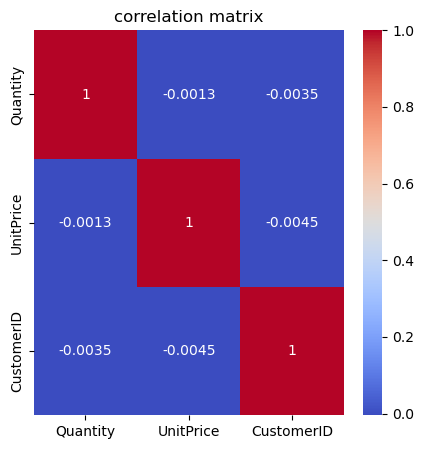

In [22]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

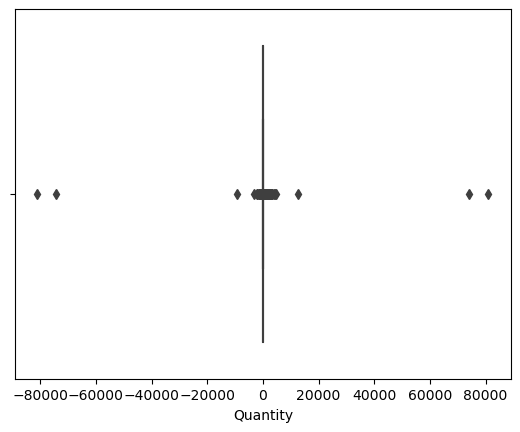

In [23]:
sns.boxplot(x= data['Quantity'])
plt.show()

As we saw earlier, we have extreme values, it seems to me that there are purchases and at the same time returns, maybe these are purchases that were made by mistake. we should check this issue.

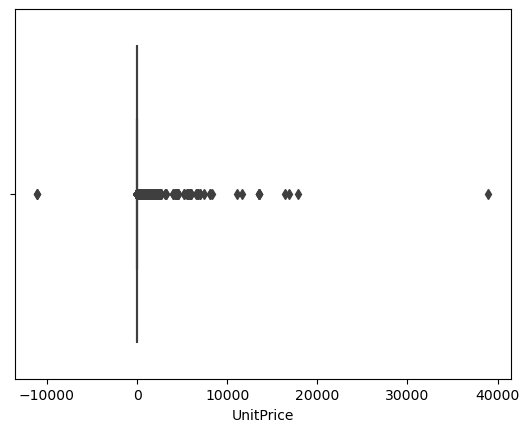

In [24]:
sns.boxplot(x= data['UnitPrice'])
plt.show()

also here we can see extreme values

**checking the most relevant data - maybe what was trendy product few months ago and now is not trendy anymore**

In [25]:
data['session_date'] = pd.to_datetime(data['InvoiceDate'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')

In [26]:
data['session_date'] = pd.to_datetime(data['session_date'])

In [27]:
data['month_year'] = data['session_date'].values.astype('datetime64[M]')

In [28]:
date_range2 = str(data['InvoiceDate'].dt.date.min()) + ' to ' +str(data['InvoiceDate'].dt.date.max())
date_range2

'2018-11-29 to 2019-12-07'

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534171 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     534171 non-null  object        
 1   StockCode     534171 non-null  object        
 2   Description   534171 non-null  object        
 3   Quantity      534171 non-null  int64         
 4   InvoiceDate   534171 non-null  datetime64[ns]
 5   UnitPrice     534171 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   session_date  534171 non-null  datetime64[ns]
 8   month_year    534171 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(3)
memory usage: 40.8+ MB


**our data is for almost 1 year, so all the records are relevant**

**before we start to analyze the product i prefer to work with  lowercase string**

In [30]:
data.columns =data.columns.str.lower()

# Analyze Products 

let's first check the negative values in Quantity and UnitPrice

In [31]:
data.sample(5)

invoiceno stockcode                     description  quantity  \
352346    567671     21172               PARTY METAL SIGN          1   
248940    558877    46000M    POLYESTER FILLER PAD 45x45cm         1   
504927    578997     22467               GUMBALL COAT RACK         1   
480684    577315     22419                LIPSTICK PEN RED         1   
475444    576890     22144  CHRISTMAS CRAFT LITTLE FRIENDS         6   

               invoicedate  unitprice  customerid session_date month_year  
352346 2019-09-19 15:34:00       4.13         NaN   2019-09-19 2019-09-01  
248940 2019-07-02 13:50:00       1.55     17841.0   2019-07-02 2019-07-01  
504927 2019-11-25 16:02:00       2.55     18001.0   2019-11-25 2019-11-01  
480684 2019-11-16 13:25:00       0.42     17811.0   2019-11-16 2019-11-01  
475444 2019-11-14 17:25:00       2.10     12662.0   2019-11-14 2019-11-01

In [32]:
data['customerid'].nunique()

4372

we have 4372 customer in our store 

In [33]:
negative = data.loc[(data['unitprice']<0)]
negative

invoiceno stockcode      description  quantity         invoicedate  \
299983   A563186         B  Adjust bad debt         1 2019-08-10 14:51:00   
299984   A563187         B  Adjust bad debt         1 2019-08-10 14:52:00   

        unitprice  customerid session_date month_year  
299983  -11062.06         NaN   2019-08-10 2019-08-01  
299984  -11062.06         NaN   2019-08-10 2019-08-01

In [34]:
negative1 = data.loc[(data['quantity']<0)]
negative1

invoiceno stockcode                       description  quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               invoicedate  unitprice  customerid session_date month_year  
141    2018-11-29 09:41:00      27.50     14527.0   2018-11-29 2018-11-01  
154    2018-11-29 09:49:00       4.65     15311.0   2018-11-29 2018-11-01  
235    2018-11-29 10:24:00       1.65     17548.0   2018-11-29 2018-11-01  
236    2018-11-29 10:24:00       0.29     17548.0   2018-11-29 2018-11-01  
237    2018-11-29 10:24:00       0.29     17548.0   2018-11-29 2018-11-01  
...                    ...        ...         ...          ...        ...  
540449 2019-12-07 09:57:00       0.83     14397.0   2019-12-07 2019-12-01  
541541 2019-12-07 10:28:00     224.69     15498.0   2019-12-07 2019-12-01  
541715 2019-12-07 11:57:00      10.95     15311.0   2019-12-07 2019-12-01  
541716 2019-12-07 11:58:00       1.25     17315.0   2019-12-07 2019-12-01  
541717 2019-12-07 11:58:00       1.25     17315.0   2019-12-07 2019-12-01  

[9251 rows x 9 columns]

**it's looks like that all 9251 rows that has negative values in the quantity column the invoiceno column start with c, maybe it means canceled order** 

In [35]:
invoicenoc = data.loc[data['invoiceno'].str.contains('C')]
invoicenoc

invoiceno stockcode                       description  quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               invoicedate  unitprice  customerid session_date month_year  
141    2018-11-29 09:41:00      27.50     14527.0   2018-11-29 2018-11-01  
154    2018-11-29 09:49:00       4.65     15311.0   2018-11-29 2018-11-01  
235    2018-11-29 10:24:00       1.65     17548.0   2018-11-29 2018-11-01  
236    2018-11-29 10:24:00       0.29     17548.0   2018-11-29 2018-11-01  
237    2018-11-29 10:24:00       0.29     17548.0   2018-11-29 2018-11-01  
...                    ...        ...         ...          ...        ...  
540449 2019-12-07 09:57:00       0.83     14397.0   2019-12-07 2019-12-01  
541541 2019-12-07 10:28:00     224.69     15498.0   2019-12-07 2019-12-01  
541715 2019-12-07 11:57:00      10.95     15311.0   2019-12-07 2019-12-01  
541716 2019-12-07 11:58:00       1.25     17315.0   2019-12-07 2019-12-01  
541717 2019-12-07 11:58:00       1.25     17315.0   2019-12-07 2019-12-01  

[9251 rows x 9 columns]

yes they are, those are returned orders, I will analyze them in a separate way

In [36]:
len(invoicenoc)/len(data)

0.017318424249912482

In [37]:
invoicenoc['total_loss'] = invoicenoc['quantity']*invoicenoc['unitprice']

C:\Users\Alar\AppData\Local\Temp\ipykernel_5412\3206683365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoicenoc['total_loss'] = invoicenoc['quantity']*invoicenoc['unitprice']


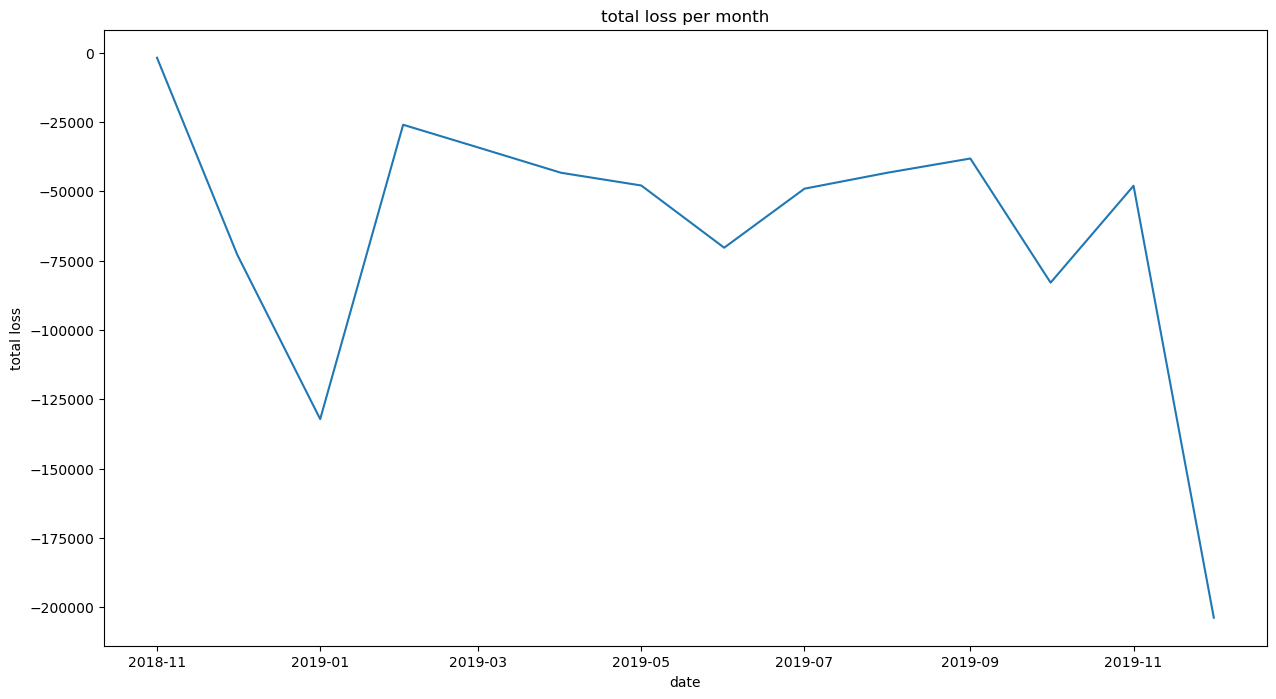

In [38]:
loss=invoicenoc.groupby(['month_year'])['total_loss'].sum().reset_index().sort_values(by='month_year')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=loss, x ='month_year', y='total_loss')

#specfiy axis labels
ax.set(xlabel='date',
       ylabel='total loss',
       title='total loss per month')
plt.show()

**again we dont know if those orders that has a big number has been made by mistakes or it's for retail customer**

In [39]:
returned =invoicenoc.groupby(['stockcode'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=True).head(15)
returned

stockcode  quantity
1507     23843    -80995
1255     23166    -74494
1663     84347     -9376
1944         M     -4066
133      21108     -3150
1831    85123A     -2578
158      21175     -2030
1066     22920     -1527
618      22273     -1447
1556    47566B     -1424
3        15034     -1385
96       20971     -1321
1589     71477     -1228
1654     84077     -1200
1942         D     -1194

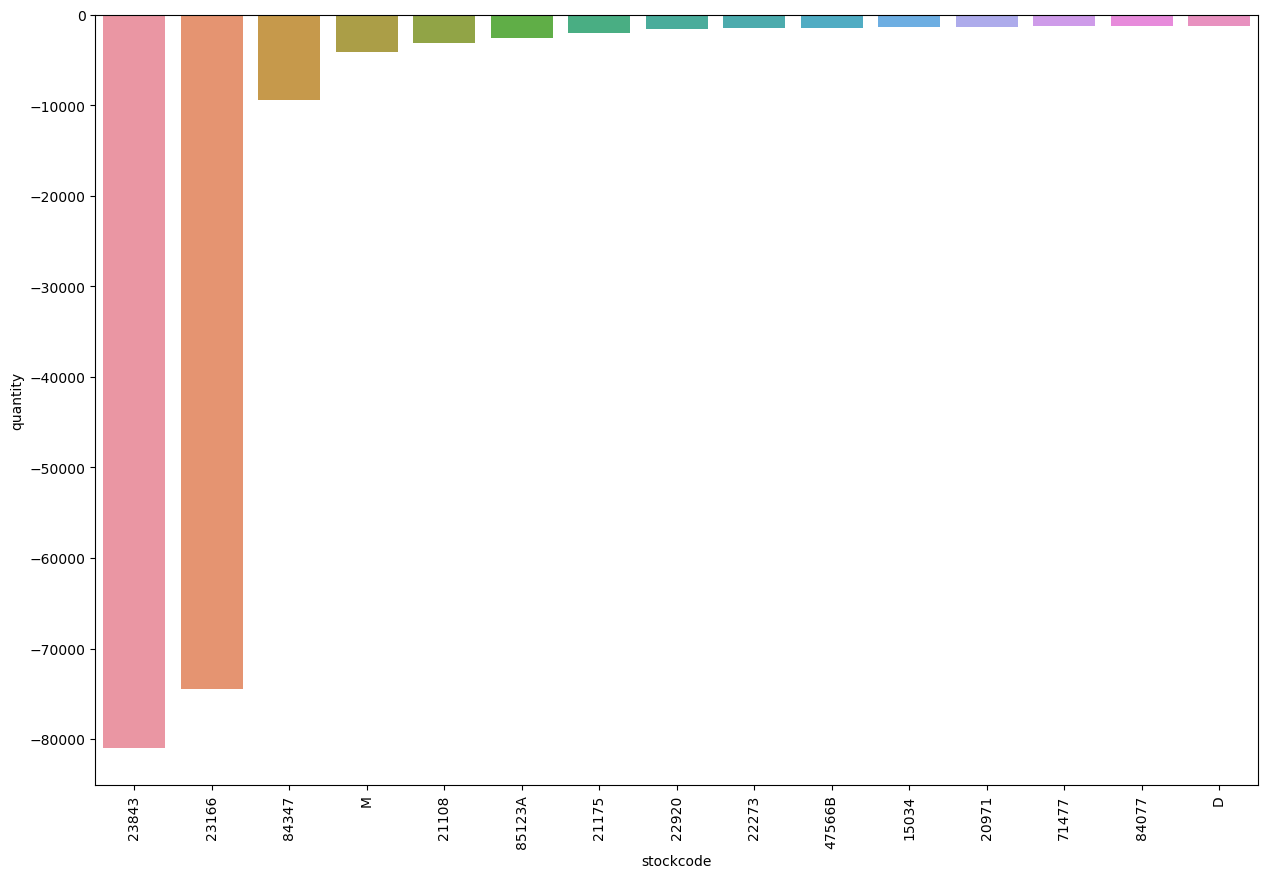

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='stockcode', y='quantity', data=returned)
plt.xticks(rotation=90)
plt.show()

In [41]:
invoicenoc.loc[(invoicenoc['stockcode']== '22423')]

invoiceno stockcode               description  quantity  \
12402    C537373     22423  REGENCY CAKESTAND 3 TIER        -1   
14535    C537602     22423  REGENCY CAKESTAND 3 TIER        -2   
18133    C537797     22423  REGENCY CAKESTAND 3 TIER        -2   
18247    C537812     22423  REGENCY CAKESTAND 3 TIER       -10   
21760    C538124     22423  REGENCY CAKESTAND 3 TIER        -1   
...          ...       ...                       ...       ...   
516185   C579878     22423  REGENCY CAKESTAND 3 TIER        -1   
516559   C579933     22423  REGENCY CAKESTAND 3 TIER        -1   
523337   C580507     22423  REGENCY CAKESTAND 3 TIER        -1   
536911   C581228     22423  REGENCY CAKESTAND 3 TIER        -6   
536986   C581235     22423  REGENCY CAKESTAND 3 TIER        -1   

               invoicedate  unitprice  customerid session_date month_year  \
12402  2018-12-04 12:55:00      12.75     14487.0   2018-12-04 2018-12-01   
14535  2018-12-05 12:45:00      10.95     17511.0   2018-12-05 2018-12-01   
18133  2018-12-06 13:07:00      10.95     13113.0   2018-12-06 2018-12-01   
18247  2018-12-06 13:33:00      10.95     14299.0   2018-12-06 2018-12-01   
21760  2018-12-07 15:43:00      12.75     15329.0   2018-12-07 2018-12-01   
...                    ...        ...         ...          ...        ...   
516185 2019-11-28 17:12:00      12.75     17340.0   2019-11-28 2019-11-01   
516559 2019-11-29 09:44:00      12.75     14853.0   2019-11-29 2019-11-01   
523337 2019-12-02 13:37:00      12.75     15867.0   2019-12-02 2019-12-01   
536911 2019-12-06 10:06:00      10.95     16019.0   2019-12-06 2019-12-01   
536986 2019-12-06 10:34:00      12.75     15950.0   2019-12-06 2019-12-01   

        total_loss  
12402       -12.75  
14535       -21.90  
18133       -21.90  
18247      -109.50  
21760       -12.75  
...            ...  
516185      -12.75  
516559      -12.75  
523337      -12.75  
536911      -65.70  
536986      -12.75  

[180 rows x 10 columns]

**for this stock code with description name, its looks like people did not like this product**

In [42]:
invoicenoc.loc[(invoicenoc['stockcode']== 'M')]

invoiceno stockcode description  quantity         invoicedate  \
14716    C537610         M      Manual        -1 2018-12-05 13:23:00   
14728    C537613         M      Manual        -1 2018-12-05 13:28:00   
21758    C538124         M      Manual        -4 2018-12-07 15:43:00   
23241    C538189         M      Manual        -1 2018-12-08 10:35:00   
28993    C538681         M      Manual        -1 2018-12-11 17:12:00   
...          ...       ...         ...       ...                 ...   
520134   C580263         M      Manual       -16 2019-11-30 12:43:00   
523375   C580510         M      Manual        -1 2019-12-02 13:48:00   
533082   C581009         M      Manual        -1 2019-12-05 09:15:00   
534308   C581145         M      Manual        -1 2019-12-05 13:48:00   
541541   C581499         M      Manual        -1 2019-12-07 10:28:00   

        unitprice  customerid session_date month_year  total_loss  
14716      631.31         NaN   2018-12-05 2018-12-01     -631.31  
14728      313.78         NaN   2018-12-05 2018-12-01     -313.78  
21758        0.50     15329.0   2018-12-07 2018-12-01       -2.00  
23241      133.08         NaN   2018-12-08 2018-12-01     -133.08  
28993      316.30         NaN   2018-12-11 2018-12-01     -316.30  
...           ...         ...          ...        ...         ...  
520134       0.29     12536.0   2019-11-30 2019-11-01       -4.64  
523375       1.25     14456.0   2019-12-02 2019-12-01       -1.25  
533082     125.00     16971.0   2019-12-05 2019-12-01     -125.00  
534308       9.95     17490.0   2019-12-05 2019-12-01       -9.95  
541541     224.69     15498.0   2019-12-07 2019-12-01     -224.69  

[244 rows x 10 columns]

**this M stockcode looks like not automatic transmissions, someone has intered the transaction**

In [43]:
invoicenoc.loc[(invoicenoc['stockcode']== 'D')]

invoiceno stockcode description  quantity         invoicedate  \
141      C536379         D    Discount        -1 2018-11-29 09:41:00   
9038     C537164         D    Discount        -1 2018-12-03 13:21:00   
14498    C537597         D    Discount        -1 2018-12-05 12:34:00   
19392    C537857         D    Discount        -1 2018-12-06 16:00:00   
31134    C538897         D    Discount        -1 2018-12-13 09:14:00   
...          ...       ...         ...       ...                 ...   
479868   C577227         D    Discount        -1 2019-11-16 12:06:00   
479869   C577227         D    Discount        -1 2019-11-16 12:06:00   
493613   C578239         D    Discount        -1 2019-11-21 12:29:00   
516221   C579884         D    Discount        -1 2019-11-28 17:34:00   
516455   C579908         D    Discount        -1 2019-11-29 08:49:00   

        unitprice  customerid session_date month_year  total_loss  
141         27.50     14527.0   2018-11-29 2018-11-01      -27.50  
9038        29.29     14527.0   2018-12-03 2018-12-01      -29.29  
14498      281.00     15498.0   2018-12-05 2018-12-01     -281.00  
19392      267.12     17340.0   2018-12-06 2018-12-01     -267.12  
31134        5.76     16422.0   2018-12-13 2018-12-01       -5.76  
...           ...         ...          ...        ...         ...  
479868      19.82     14527.0   2019-11-16 2019-11-01      -19.82  
479869      16.76     14527.0   2019-11-16 2019-11-01      -16.76  
493613      26.33     14912.0   2019-11-21 2019-11-01      -26.33  
516221      20.53     14527.0   2019-11-28 2019-11-01      -20.53  
516455      28.68     14527.0   2019-11-29 2019-11-01      -28.68  

[77 rows x 10 columns]

and here we can see discount, maybe this is promo code or something like that

**let's start our analysis for recordS that are not include the returned items:**

In [44]:
data1 = data.drop(data.index[data['quantity'] < 0])

In [45]:
data1['total'] = data1['quantity']*data1['unitprice']

In [46]:
data1.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid session_date month_year  total  
0 2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01  15.30  
1 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34  
2 2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01  22.00  
3 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34  
4 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34

In [47]:
orders =data1.groupby(['stockcode'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(20)
orders

stockcode  quantity
2465     23843     80995
2020     23166     78033
1109     22197     56898
2909     84077     54951
3387    85099B     48371
3407    85123A     37641
439      21212     36396
3194     84879     36362
1942     23084     30739
1374     22492     26633
1492     22616     26119
930      21977     24820
1090     22178     24275
12       15036     23826
80       17003     23020
897      21915     21903
1279     22386     21448
2056     23203     20485
175      20725     19432
1006     22086     19329

In [48]:
data1.loc[(data1['stockcode']== '23843')]

invoiceno stockcode                  description  quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               invoicedate  unitprice  customerid session_date month_year  \
540421 2019-12-07 09:15:00       2.08     16446.0   2019-12-07 2019-12-01   

           total  
540421  168469.6

In [49]:
invoicenoc.loc[(invoicenoc['stockcode']== '23843')]

invoiceno stockcode                  description  quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               invoicedate  unitprice  customerid session_date month_year  \
540422 2019-12-07 09:27:00       2.08     16446.0   2019-12-07 2019-12-01   

        total_loss  
540422   -168469.6

**the same most returned item is the most buyed item, i wanted to check if this a returned transaction and yes it is**

In [50]:
data1.loc[(data1['stockcode']== '23166')]

invoiceno stockcode                     description  quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
186770    552882     23166  MEDIUM CERAMIC TOP STORAGE JAR        96   
187196    552953     23166  MEDIUM CERAMIC TOP STORAGE JAR         4   
187718    553005     23166  MEDIUM CERAMIC TOP STORAGE JAR         5   
187868    553009     23166  MEDIUM CERAMIC TOP STORAGE JAR         3   
...          ...       ...                             ...       ...   
533742    581108     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
536248    581219     23166  MEDIUM CERAMIC TOP STORAGE JAR         1   
539776    581439     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   
540301    581476     23166  MEDIUM CERAMIC TOP STORAGE JAR        48   
541101    581492     23166  MEDIUM CERAMIC TOP STORAGE JAR         2   

               invoicedate  unitprice  customerid session_date month_year  \
61619  2019-01-16 10:01:00       1.04     12346.0   2019-01-16 2019-01-01   
186770 2019-05-10 10:10:00       1.04     14646.0   2019-05-10 2019-05-01   
187196 2019-05-10 12:11:00       1.25     16745.0   2019-05-10 2019-05-01   
187718 2019-05-10 16:29:00       1.25     14651.0   2019-05-10 2019-05-01   
187868 2019-05-10 16:52:00       1.25     13601.0   2019-05-10 2019-05-01   
...                    ...        ...         ...          ...        ...   
533742 2019-12-05 12:16:00       1.25     15984.0   2019-12-05 2019-12-01   
536248 2019-12-06 09:28:00       2.46         NaN   2019-12-06 2019-12-01   
539776 2019-12-06 16:30:00       2.46         NaN   2019-12-06 2019-12-01   
540301 2019-12-07 08:48:00       1.04     12433.0   2019-12-07 2019-12-01   
541101 2019-12-07 10:03:00       2.46         NaN   2019-12-07 2019-12-01   

           total  
61619   77183.60  
186770     99.84  
187196      5.00  
187718      6.25  
187868      3.75  
...          ...  
533742      2.50  
536248      2.46  
539776      4.92  
540301     49.92  
541101      4.92  

[250 rows x 10 columns]

In [51]:
invoicenoc.loc[(invoicenoc['stockcode']== '23166')]

invoiceno stockcode                     description  quantity  \
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
203625   C554527     23166  MEDIUM CERAMIC TOP STORAGE JAR        -9   
234364   C557508     23166  MEDIUM CERAMIC TOP STORAGE JAR      -240   
270084   C560540     23166  MEDIUM CERAMIC TOP STORAGE JAR        -1   
290357   C562375     23166  MEDIUM CERAMIC TOP STORAGE JAR       -12   
297530   C562952     23166  MEDIUM CERAMIC TOP STORAGE JAR        -1   
349848   C567535     23166  MEDIUM CERAMIC TOP STORAGE JAR        -1   
352712   C567677     23166  MEDIUM CERAMIC TOP STORAGE JAR        -2   
394002   C570867     23166  MEDIUM CERAMIC TOP STORAGE JAR       -12   
421501   C572991     23166  MEDIUM CERAMIC TOP STORAGE JAR        -1   

               invoicedate  unitprice  customerid session_date month_year  \
61624  2019-01-16 10:17:00       1.04     12346.0   2019-01-16 2019-01-01   
203625 2019-05-22 17:25:00       1.04     15251.0   2019-05-22 2019-05-01   
234364 2019-06-18 16:13:00       1.04     16684.0   2019-06-18 2019-06-01   
270084 2019-07-17 12:26:00       1.25     12415.0   2019-07-17 2019-07-01   
290357 2019-08-02 14:46:00       1.25     14911.0   2019-08-02 2019-08-01   
297530 2019-08-09 10:10:00       1.25     12749.0   2019-08-09 2019-08-01   
349848 2019-09-19 09:50:00       1.25     15253.0   2019-09-19 2019-09-01   
352712 2019-09-19 15:57:00       1.04     12409.0   2019-09-19 2019-09-01   
394002 2019-10-10 16:17:00       1.25     12607.0   2019-10-10 2019-10-01   
421501 2019-10-25 10:56:00       1.25     17672.0   2019-10-25 2019-10-01   

        total_loss  
61624    -77183.60  
203625       -9.36  
234364     -249.60  
270084       -1.25  
290357      -15.00  
297530       -1.25  
349848       -1.25  
352712       -2.08  
394002      -15.00  
421501       -1.25

In [52]:
data1.loc[(data1['total']>3000)]

invoiceno  stockcode                          description  quantity  \
15017     537632  AMAZONFEE                           AMAZON FEE         1   
16438     537659      21623         VINTAGE UNION JACK MEMOBOARD       600   
19871     537899      22328   ROUND SNACK BOXES SET OF 4 FRUITS       1488   
52132     540689     85123A   WHITE HANGING HEART T-LIGHT HOLDER      1010   
52134     540689      22470                HEART OF WICKER LARGE      1284   
52709     540815     85123A   WHITE HANGING HEART T-LIGHT HOLDER      1930   
52710     540815      21175          GIN + TONIC DIET METAL SIGN      2000   
52711     540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
52771     540818     47556B                 TEA TIME TEA TOWELS       1300   
52772     540818      48185                   DOORMAT FAIRY CAKE       670   
61619     541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
84319     543378      21623         VINTAGE UNION JACK MEMOBOARD       504   
84323     543379      21623         VINTAGE UNION JACK MEMOBOARD       504   
97432     544612      22053                EMPIRE DESIGN ROSETTE      3906   
160542    550461     85123A   WHITE HANGING HEART T-LIGHT HOLDER      1930   
160544    550461      48185                   DOORMAT FAIRY CAKE       670   
160545    550461      21175          GIN + TONIC DIET METAL SIGN      2000   
160546    550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
173382    551697       POST                              POSTAGE         1   
202151    554366      22349         DOG BOWL CHASING BALL DESIGN       756   
206121    554868      22197                 SMALL POPCORN HOLDER      4300   
222680    556444      22502       PICNIC BASKET WICKER 60 PIECES        60   
244419    558526      23173                REGENCY TEAPOT ROSES        540   
268028    560373          M                               Manual         1   
282266    561633      23173                REGENCY TEAPOT ROSES        384   
291249    562439      84879        ASSORTED COLOUR BIRD ORNAMENT      2880   
297723    562955        DOT                       DOTCOM POSTAGE         1   
299982   A563185          B                      Adjust bad debt         1   
348212    567381      22508             DOORSTOP RETROSPOT HEART       744   
348319    567423      23113                PANTRY CHOPPING BOARD       756   
348323    567423      22722    SET OF 6 SPICE TINS PANTRY DESIGN       852   
348324    567423      22720    SET OF 3 CAKE TINS PANTRY DESIGN        612   
348325    567423      23243  SET OF TEA COFFEE SUGAR TINS PANTRY      1412   
374542    569382          M                               Manual         1   
406406    571751          M                               Manual         1   
411229    572209      23556        LANDMARK FRAME COVENT GARDEN        300   
411230    572209      23554         LANDMARK FRAME OXFORD STREET       300   
411231    572209      23555         LANDMARK FRAME NOTTING HILL        300   
411232    572209      23558        LANDMARK FRAME LONDON BRIDGE        300   
411234    572209      23553          LANDMARK FRAME CAMDEN TOWN        300   
411235    572209      23557         LANDMARK FRAME BAKER STREET        300   
421601    573003      23084                   RABBIT NIGHT LIGHT      2400   
422351    573077          M                               Manual         1   
422376    573080          M                               Manual         1   
437471    574293     85123A   WHITE HANGING HEART T-LIGHT HOLDER       992   
447007    574941      23084                   RABBIT NIGHT LIGHT       628   
447035    574941      22197                       POPCORN HOLDER      1820   
447040    574941      22086      PAPER CHAIN KIT 50'S CHRISTMAS        478   
467804    576365      22086      PAPER CHAIN KIT 50'S CHRISTMAS        688   
511421    579498      23084                   RABBIT NIGHT LIGHT      2040   
533812    581115      22413  

**we should drop those big quantities from the data: i decided to drop those rows by total column because sometimes people buy for example 100 units and the price is only 1 and then the total is not that big, so we can select those big quantities by the total column, people made that transaction by mistake ( I think people don't buy in the website in those amounts of money)  also we can see in the stockcode AMAZONFEE I checked this code in the returned items and there is a lot of returned money for this fee (maybe they charged the customer by mistake)**

In [53]:
data1[data1['total'] ==0]

invoiceno stockcode                          description  quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               invoicedate  unitprice  customerid session_date month_year  \
9302   2018-12-03 14:02:00        0.0     12647.0   2018-12-03 2018-12-01   
33576  2018-12-14 14:36:00        0.0     16560.0   2018-12-14 2018-12-01   
40089  2018-12-19 13:45:00        0.0     14911.0   2018-12-19 2018-12-01   
47068  2019-01-04 16:41:00        0.0     13081.0   2019-01-04 2019-01-01   
47070  2019-01-04 16:41:00        0.0     13081.0   2019-01-04 2019-01-01   
56674  2019-01-11 15:10:00        0.0     15107.0   2019-01-11 2019-01-01   
86789  2019-02-08 13:08:00        0.0     17560.0   2019-02-08 2019-02-01   
130188 2019-03-21 10:25:00        0.0     13239.0   2019-03-21 2019-03-01   
139453 2019-03-28 12:45:00        0.0     13113.0   2019-03-28 2019-03-01   
145208 2019-04-02 14:42:00        0.0     14410.0   2019-04-02 2019-04-01   
15

In [54]:
data1 = data1.drop(data1.index[data1['total'] > 3000])

In [55]:
data1 = data1.drop(data1.index[data1['total'] == 0])

In [56]:
data1[data1['unitprice']<0]

invoiceno stockcode      description  quantity         invoicedate  \
299983   A563186         B  Adjust bad debt         1 2019-08-10 14:51:00   
299984   A563187         B  Adjust bad debt         1 2019-08-10 14:52:00   

        unitprice  customerid session_date month_year     total  
299983  -11062.06         NaN   2019-08-10 2019-08-01 -11062.06  
299984  -11062.06         NaN   2019-08-10 2019-08-01 -11062.06

In [57]:
data1 = data1.drop(data1.index[data1['unitprice']<0])

In [58]:
data1[data1['unitprice']==0]

Empty DataFrame
Columns: [invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid, session_date, month_year, total]
Index: []

In [59]:
orders =data1.groupby(['stockcode'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(20)
orders

stockcode  quantity
2908     84077     54951
1109     22197     50778
3386    85099B     48371
439      21212     36396
3193     84879     33482
3406    85123A     31779
1374     22492     26633
1492     22616     26119
1942     23084     25671
930      21977     24820
1090     22178     24275
12       15036     23826
80       17003     23020
897      21915     21903
1279     22386     21448
2056     23203     20485
175      20725     19432
3233     84946     19209
2669     47566     18283
3275     84991     18189

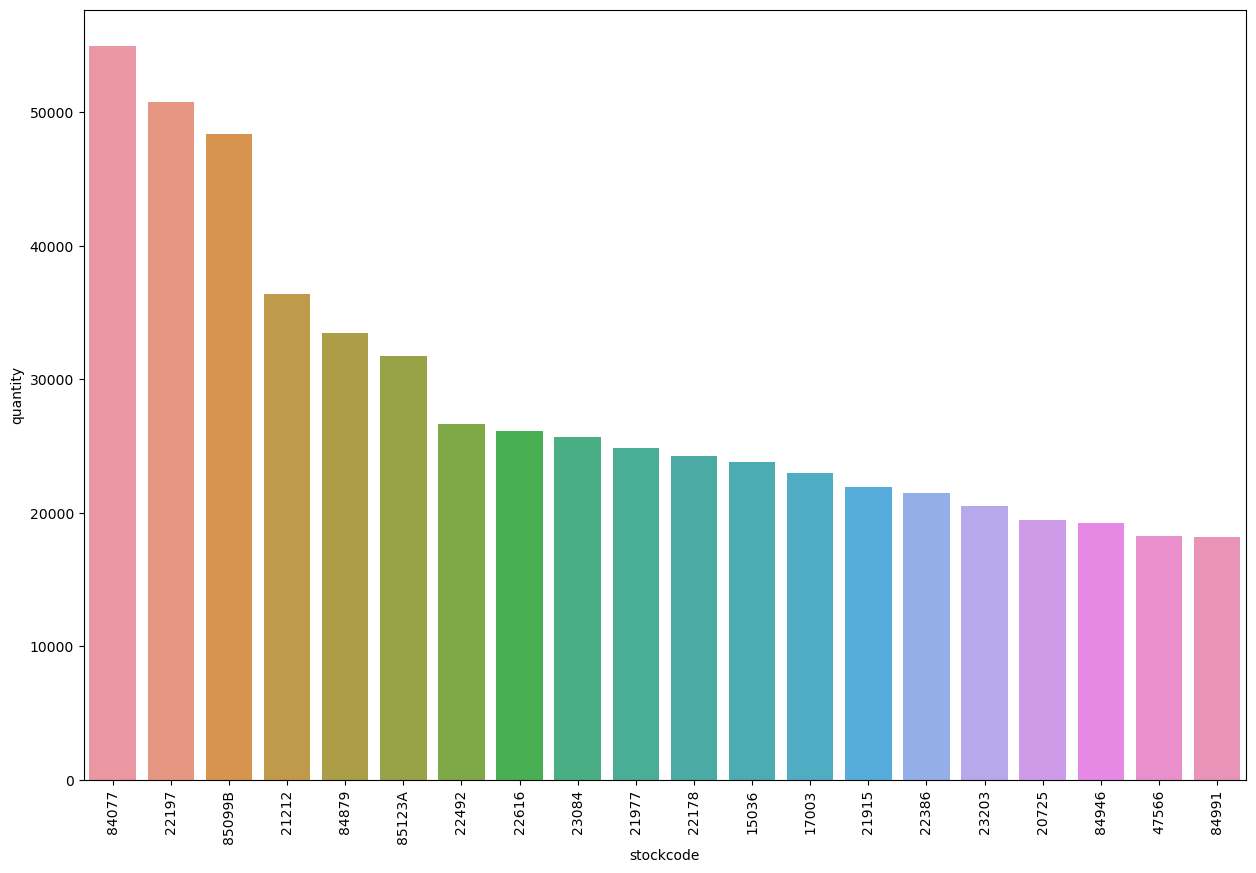

In [60]:
plt.figure(figsize=(15, 10))
sns.barplot(x='stockcode', y='quantity', data=orders)
plt.xticks(rotation=90)
plt.show()


# categorize products.

In [61]:
items = data1.groupby(['stockcode'])['description'].sum()
items

stockcode
10002           INFLATABLE POLITICAL GLOBE INFLATABLE POLITICA...
10080           GROOVY CACTUS INFLATABLEGROOVY CACTUS INFLATAB...
10120           DOGGY RUBBERDOGGY RUBBERDOGGY RUBBERDOGGY RUBB...
10123C          HEARTS WRAPPING TAPE HEARTS WRAPPING TAPE HEAR...
10124A          SPOTS ON RED BOOKCOVER TAPESPOTS ON RED BOOKCO...
                                      ...                        
gift_0001_20    Dotcomgiftshop Gift Voucher £20.00Dotcomgiftsh...
gift_0001_30    Dotcomgiftshop Gift Voucher £30.00Dotcomgiftsh...
gift_0001_40    Dotcomgiftshop Gift Voucher £40.00Dotcomgiftsh...
gift_0001_50    Dotcomgiftshop Gift Voucher £50.00Dotcomgiftsh...
m                                                          Manual
Name: description, Length: 3920, dtype: object

In [62]:
documents = data1['description'].values.astype("U")

In [63]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [64]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [65]:
data1['cluster'] = model.labels_

In [66]:
data1.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid session_date month_year  total  \
0 2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01  15.30   
1 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
2 2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01  22.00   
3 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
4 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [67]:
data1['cluster'].value_counts()

0    381195
4     60976
2     43414
3     31466
1      7774
Name: cluster, dtype: int64

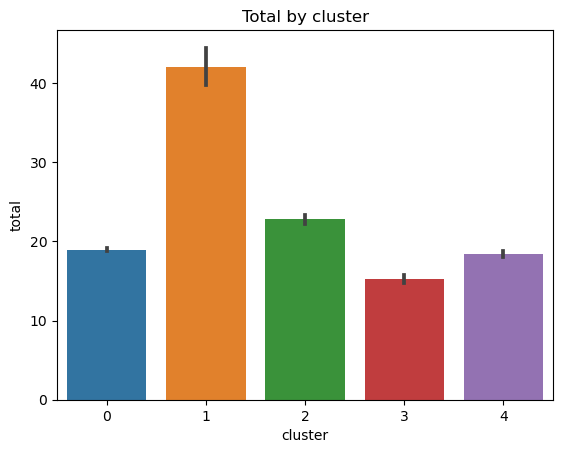

In [68]:
# Now, we can use Seaborn to plot the total by cluster
sns.barplot(x='cluster', y='total', data=data1)
plt.xlabel('cluster')
plt.ylabel('total')
plt.title('Total by cluster')
plt.show()

In [69]:
data1['cluster'].value_counts()

0    381195
4     60976
2     43414
3     31466
1      7774
Name: cluster, dtype: int64

In [70]:
cluster4 = data1.loc[(data1['cluster']==4)]
cluster4

invoiceno stockcode                          description  quantity  \
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
21        536368     22960             JAM MAKING SET WITH JARS         6   
33        536370     21035      SET/2 RED RETROSPOT TEA TOWELS         18   
34        536370     22326  ROUND SNACK BOXES SET OF4 WOODLAND         24   
40        536370     22900      SET 2 TEA TOWELS I LOVE LONDON         24   
...          ...       ...                                  ...       ...   
541882    581585     21916      SET 12 RETRO WHITE CHALK STICKS        24   
541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid session_date month_year  \
5      2018-11-29 08:26:00       7.65     17850.0   2018-11-29 2018-11-01   
21     2018-11-29 08:34:00       4.25     13047.0   2018-11-29 2018-11-01   
33     2018-11-29 08:45:00       2.95     12583.0   2018-11-29 2018-11-01   
34     2018-11-29 08:45:00       2.95     12583.0   2018-11-29 2018-11-01   
40     2018-11-29 08:45:00       2.95     12583.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
541882 2019-12-07 12:31:00       0.42     15804.0   2019-12-07 2019-12-01   
541887 2019-12-07 12:31:00       3.75     15804.0   2019-12-07 2019-12-01   
541891 2019-12-07 12:49:00       1.25     13113.0   2019-12-07 2019-12-01   
541892 2019-12-07 12:49:00       8.95     13113.0   2019-12-07 2019-12-01   
541908 2019-12-07 12:50:00       4.95     12680.0   2019-12-07 2019-12-01   

         total  cluster  
5        15.30        4  
21       25.50        4  
33       53.10        4  
34       70.80        4  
40       70.80        4  
...        ...      ...  
541882   10.08        4  
541887   15.00        4  
541891   30.00        4  
541892  214.80        4  
541908   14.85        4  

[60976 rows x 11 columns]

In [71]:
cluster4['description'].value_counts()

SET OF 3 CAKE TINS PANTRY DESIGN       1391
JAM MAKING SET PRINTED                 1164
JAM MAKING SET WITH JARS               1133
SET OF 4 PANTRY JELLY MOULDS           1090
SET/20 RED RETROSPOT PAPER NAPKINS     1005
                                       ... 
SET 36 COLOURING PENCILS DOILEY           1
SET 12 COLOURING PENCILS DOILEY           1
SET OF 4 KNICK KNACK TINS  DOILEY         1
CURIOUS IMAGES SCRAP BOOK SET             1
FOOD COVER WITH BEADS , SET 2 SIZES       1
Name: description, Length: 358, dtype: int64

In [72]:
cluster0 = data1.loc[(data1['cluster']==0)]
cluster0

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541903    581587     23256          CHILDRENS CUTLERY SPACEBOY          4   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
541903 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
541904 2019-12-07 12:50:00       0.85     12680.0   2019-12-07 2019-12-01   
541905 2019-12-07 12:50:00       2.10     12680.0   2019-12-07 2019-12-01   
541906 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
541907 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   

        total  cluster  
0       15.30        0  
1       20.34        0  
2       22.00        0  
3       20.34        0  
4       20.34        0  
...       ...      ...  
541903  16.60        0  
541904  10.20        0  
541905  12.60        0  
541906  16.60        0  
541907  16.60        0  

[381195 rows x 11 columns]

In [73]:
cluster0['description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2307
PARTY BUNTING                         1699
ASSORTED COLOUR BIRD ORNAMENT         1475
PACK OF 72 RETROSPOT CAKE CASES       1352
NATURAL SLATE HEART CHALKBOARD        1255
                                      ... 
GLASS BEAD HOOP NECKLACE BLACK           1
BLACK CHERRY LIGHTS                      1
DOLPHIN WINDMILL                         1
PICNIC BASKET WICKER 60 PIECES           1
M/COLOUR POM-POM CURTAIN                 1
Name: description, Length: 3213, dtype: int64

In [74]:
cluster3 = data1.loc[(data1['cluster']==3)]
cluster3

invoiceno stockcode                         description  quantity  \
26        536370     22728           ALARM CLOCK BAKELIKE PINK        24   
86        536378     22386             JUMBO BAG PINK POLKADOT        10   
98        536378     21977  PACK OF 60 PINK PAISLEY CAKE CASES        24   
121       536381    37444C      PINK BREAKFAST CUP AND SAUCER          1   
147       536382     22381              TOY TIDY PINK POLKADOT        50   
...          ...       ...                                 ...       ...   
541770    581578     21122  SET/10 PINK POLKADOT PARTY CANDLES        24   
541776    581578    84997D     CHILDRENS CUTLERY POLKADOT PINK         8   
541778    581578    84997C     CHILDRENS CUTLERY POLKADOT BLUE         8   
541806    581579     22386             JUMBO BAG PINK POLKADOT        10   
541897    581587     22728           ALARM CLOCK BAKELIKE PINK         4   

               invoicedate  unitprice  customerid session_date month_year  \
26     2018-11-29 08:45:00       3.75     12583.0   2018-11-29 2018-11-01   
86     2018-11-29 09:37:00       1.95     14688.0   2018-11-29 2018-11-01   
98     2018-11-29 09:37:00       0.55     14688.0   2018-11-29 2018-11-01   
121    2018-11-29 09:41:00       2.95     15311.0   2018-11-29 2018-11-01   
147    2018-11-29 09:45:00       1.85     16098.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
541770 2019-12-07 12:16:00       1.25     12713.0   2019-12-07 2019-12-01   
541776 2019-12-07 12:16:00       4.15     12713.0   2019-12-07 2019-12-01   
541778 2019-12-07 12:16:00       4.15     12713.0   2019-12-07 2019-12-01   
541806 2019-12-07 12:19:00       1.79     17581.0   2019-12-07 2019-12-01   
541897 2019-12-07 12:50:00       3.75     12680.0   2019-12-07 2019-12-01   

        total  cluster  
26      90.00        3  
86      19.50        3  
98      13.20        3  
121      2.95        3  
147     92.50        3  
...       ...      ...  
541770  30.00        3  
541776  33.20        3  
541778  33.20        3  
541806  17.90        3  
541897  15.00        3  

[31466 rows x 11 columns]

In [75]:
cluster3['description'].value_counts()

JUMBO BAG PINK POLKADOT               1232
LUNCH BAG PINK POLKADOT               1101
PACK OF 60 PINK PAISLEY CAKE CASES     880
ALARM CLOCK BAKELIKE PINK              791
CHARLOTTE BAG PINK POLKADOT            755
                                      ... 
NECKLACE+BRACELET SET PINK DAISY         1
FRYING PAN RED POLKADOT                  1
PINK CHERRY BLOSSOM CUP & SAUCER         1
WRAP  PINK FLOCK                         1
PINK FEATHER CHRISTMAS DECORATION        1
Name: description, Length: 348, dtype: int64

**let's check whitch category has high demand for the product that included :**

<AxesSubplot:xlabel='cluster', ylabel='quantity'>

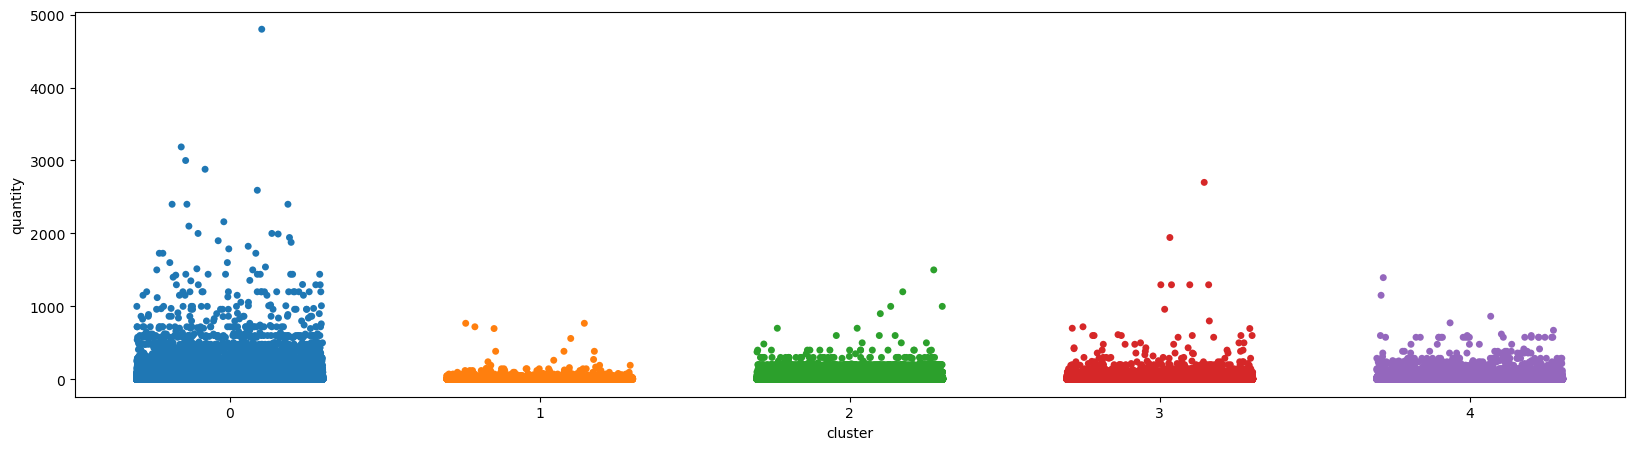

In [76]:
plt.figure(figsize=(20,5))
sns.stripplot(data=data1, x='cluster', y='quantity', jitter=0.3)

category 0 have a high demand for the product that included in 

In [77]:
highcluster0 =data1[data1['cluster'] == 0]

In [78]:
cluster0 =highcluster0.groupby(['description',])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(20)
cluster0

description  quantity
3127    WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
2081      PACK OF 72 RETROSPOT CAKE CASES     36396
2243                       POPCORN HOLDER     34929
199         ASSORTED COLOUR BIRD ORNAMENT     33482
3053   WHITE HANGING HEART T-LIGHT HOLDER     32010
2050           PACK OF 12 LONDON TISSUES      26119
2301                   RABBIT NIGHT LIGHT     25671
2900      VICTORIAN GLASS HANGING T-LIGHT     24275
207             ASSORTED COLOURS SILK FAN     23826
497                   BROCADE RING PURSE      23020
2323               RED  HARMONICA IN BOX      21903
2152                        PARTY BUNTING     18283
95            60 TEATIME FAIRY CAKE CASES     18189
2121      PAPER CHAIN KIT 50'S CHRISTMAS      18163
1497                HEART OF WICKER SMALL     17963
751   COLOUR GLASS T-LIGHT HOLDER HANGING     16401
1418   GROW A FLYTRAP OR SUNFLOWER IN TIN     16244
93        60 CAKE CASES VINTAGE CHRISTMAS     16032
2654                 SMALL POPCORN HOLDER     15849
2082          PACK OF 72 SKULL CAKE CASES     15169

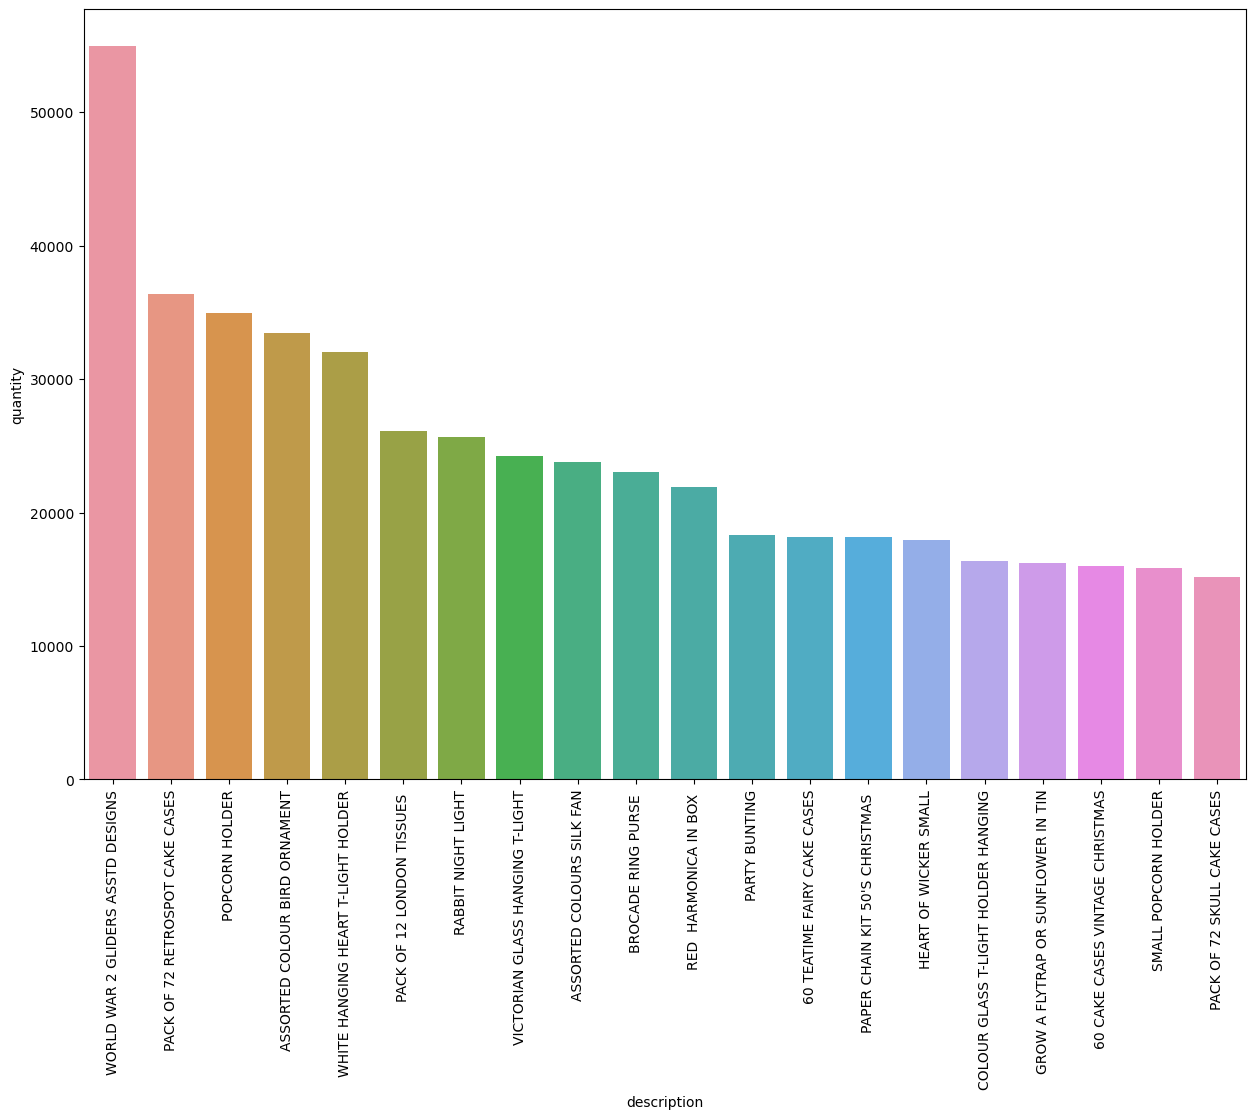

In [151]:
plt.figure(figsize=(15, 10))
sns.barplot(x='description', y='quantity', data=cluster0)
plt.xticks(rotation=90)
plt.show()

**this category includes items that belong to kitchen, so interesting people love to buy those items**

**let's see the sales for this category:**

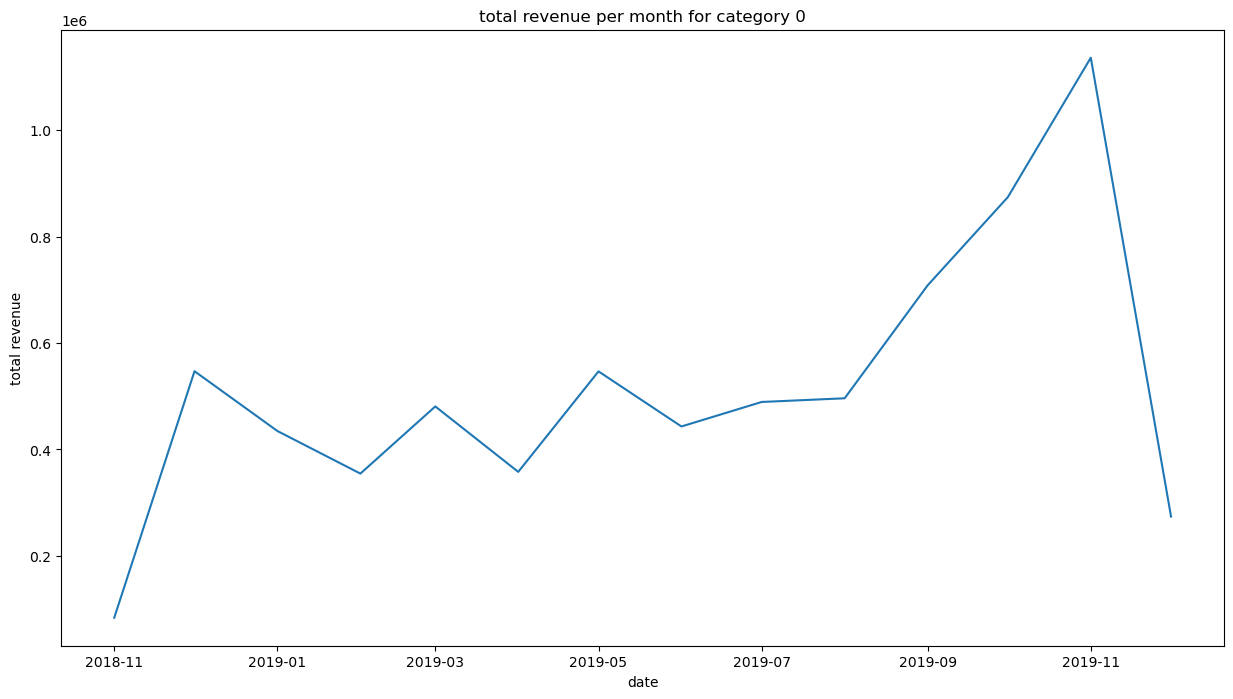

In [80]:
revenue0=highcluster0.groupby(['month_year'])['total'].sum().reset_index().sort_values(by='month_year')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=revenue0, x ='month_year', y='total')

#specfiy axis labels
ax.set(xlabel='date',
       ylabel='total revenue',
       title='total revenue per month for category 0')
plt.show()

* calculate the average amount of purchases among the time 

In [81]:
grouped_dates2=data1.groupby(['cluster', 'month_year'])['total'].sum().reset_index().sort_values(by='month_year')
grouped_dates2

cluster month_year      total
0         0 2018-11-01   83780.94
28        2 2018-11-01    3881.78
42        3 2018-11-01    4977.19
14        1 2018-11-01    3849.89
56        4 2018-11-01    9916.41
..      ...        ...        ...
55        3 2019-12-01    9776.40
27        1 2019-12-01    9099.27
13        0 2019-12-01  273800.31
41        2 2019-12-01   25063.72
69        4 2019-12-01   34920.52

[70 rows x 3 columns]

* Average inventory sold per day per category

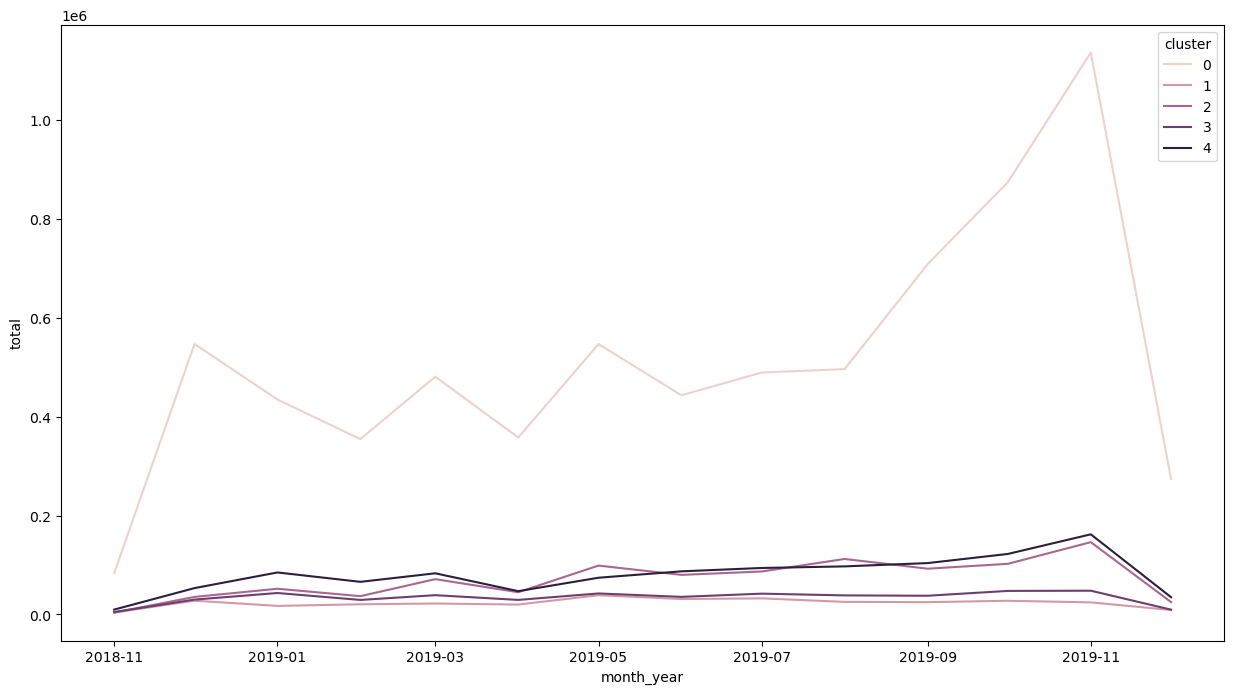

In [82]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=grouped_dates2, x ='month_year', y='total', hue='cluster')

In [83]:
grouped=data1.groupby(['cluster'])['total','quantity'].sum().reset_index().sort_values(by='total')
grouped

C:\Users\Alar\AppData\Local\Temp\ipykernel_5412\4144350896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=data1.groupby(['cluster'])['total','quantity'].sum().reset_index().sort_values(by='total')


cluster        total  quantity
1        1   326603.770     66588
3        3   478691.480    308016
2        2   989409.660    530868
4        4  1120832.600    522752
0        0  7226364.924   3936447

* divide customers into segments according to average amount of money they spent in the store


In [84]:
customers = data1[['customerid']].drop_duplicates()

In [85]:
transaction_per_customer = data1.groupby('customerid')['invoiceno'].nunique().reset_index(name="transaction_numbers")

In [86]:
customers = pd.merge(data1, transaction_per_customer, on='customerid')
customers

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392642    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
392643    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
392644    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
392645    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
392646    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
392642 2019-12-07 12:16:00       1.25     12713.0   2019-12-07 2019-12-01   
392643 2019-12-07 12:16:00       0.85     12713.0   2019-12-07 2019-12-01   
392644 2019-12-07 12:16:00       0.85     12713.0   2019-12-07 2019-12-01   
392645 2019-12-07 12:16:00       2.08     12713.0   2019-12-07 2019-12-01   
392646 2019-12-07 12:16:00       1.65     12713.0   2019-12-07 2019-12-01   

        total  cluster  transaction_numbers  
0       15.30        0                   34  
1       20.34        0                   34  
2       22.00        0                   34  
3       20.34        0                   34  
4       20.34        0                   34  
...       ...      ...                  ...  
392642  15.00        4                    1  
392643  10.20        0                    1  
392644  10.20        0                    1  
392645  24.96        0                    1  
392646  16.50        0                    1  

[392647 rows x 12 columns]

In [87]:
order_per_user=data1.groupby(by=['customerid'])['total'].agg(['mean'])
order_per_user

mean
customerid           
12347.0     23.681319
12348.0     57.975484
12349.0     24.076027
12350.0     19.670588
12352.0     29.482824
...               ...
18280.0     18.060000
18281.0     11.545714
18282.0     14.837500
18283.0      2.837074
18287.0     26.246857

[4335 rows x 1 columns]

In [88]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(order_per_user)
    Sum_of_squared_distances.append(kmeans.inertia_)

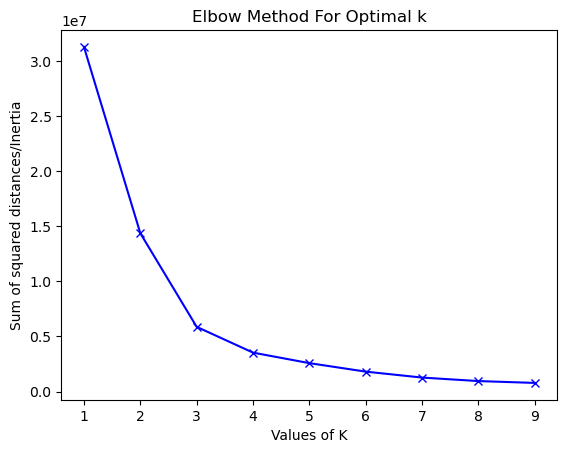

In [89]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The point at which the elbow shape is created is 3, our K value or an optimal number of clusters is 3. Now let’s train the model on the input data with a number of clusters 3.

In [90]:
algorithm = KMeans(n_clusters = 3) 
algorithm.fit(order_per_user)
clusters = algorithm.labels_
order_per_user['segment_customers'] = clusters
order_per_user

mean  segment_customers
customerid                              
12347.0     23.681319                  0
12348.0     57.975484                  0
12349.0     24.076027                  0
12350.0     19.670588                  0
12352.0     29.482824                  0
...               ...                ...
18280.0     18.060000                  0
18281.0     11.545714                  0
18282.0     14.837500                  0
18283.0      2.837074                  0
18287.0     26.246857                  0

[4335 rows x 2 columns]

In [91]:
order_per_user.reset_index()

customerid       mean  segment_customers
0        12347.0  23.681319                  0
1        12348.0  57.975484                  0
2        12349.0  24.076027                  0
3        12350.0  19.670588                  0
4        12352.0  29.482824                  0
...          ...        ...                ...
4330     18280.0  18.060000                  0
4331     18281.0  11.545714                  0
4332     18282.0  14.837500                  0
4333     18283.0   2.837074                  0
4334     18287.0  26.246857                  0

[4335 rows x 3 columns]

<AxesSubplot:xlabel='segment_customers', ylabel='mean'>

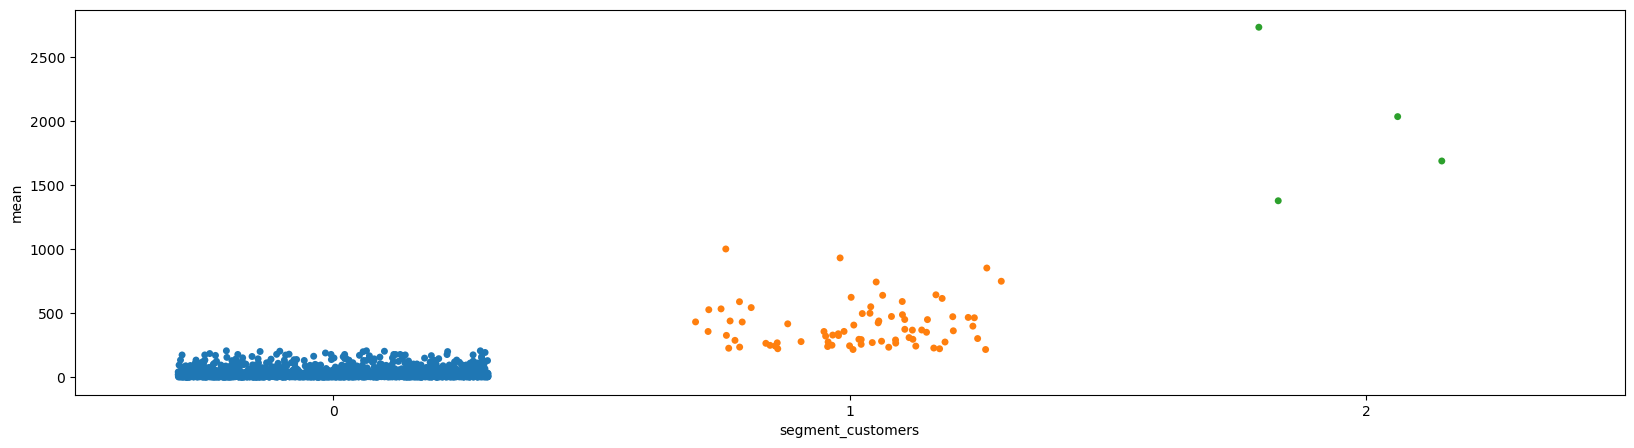

In [92]:
plt.figure(figsize=(20,5))
sns.stripplot(data=order_per_user, x='segment_customers', y='mean', jitter=0.3)

In [93]:
order_per_user['segment_customers'].value_counts()

0    4256
1      75
2       4
Name: segment_customers, dtype: int64

In [94]:
data1.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid session_date month_year  total  \
0 2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01  15.30   
1 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
2 2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01  22.00   
3 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
4 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [95]:
data1 = pd.merge(data1, order_per_user, how="left", on="customerid")
data1

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524820    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524821    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524822    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524823    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524824    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
524820 2019-12-07 12:50:00       0.85     12680.0   2019-12-07 2019-12-01   
524821 2019-12-07 12:50:00       2.10     12680.0   2019-12-07 2019-12-01   
524822 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524823 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524824 2019-12-07 12:50:00       4.95     12680.0   2019-12-07 2019-12-01   

        total  cluster       mean  segment_customers  
0       15.30        0  18.152222                0.0  
1       20.34        0  18.152222                0.0  
2       22.00        0  18.152222                0.0  
3       20.34        0  18.152222                0.0  
4       20.34        0  18.152222                0.0  
...       ...      ...        ...                ...  
524820  10.20        0  16.592500                0.0  
524821  12.60        0  16.592500                0.0  
524822  16.60        0  16.592500                0.0  
524823  16.60        0  16.592500                0.0  
524824  14.85        4  16.592500                0.0  

[524825 rows x 13 columns]

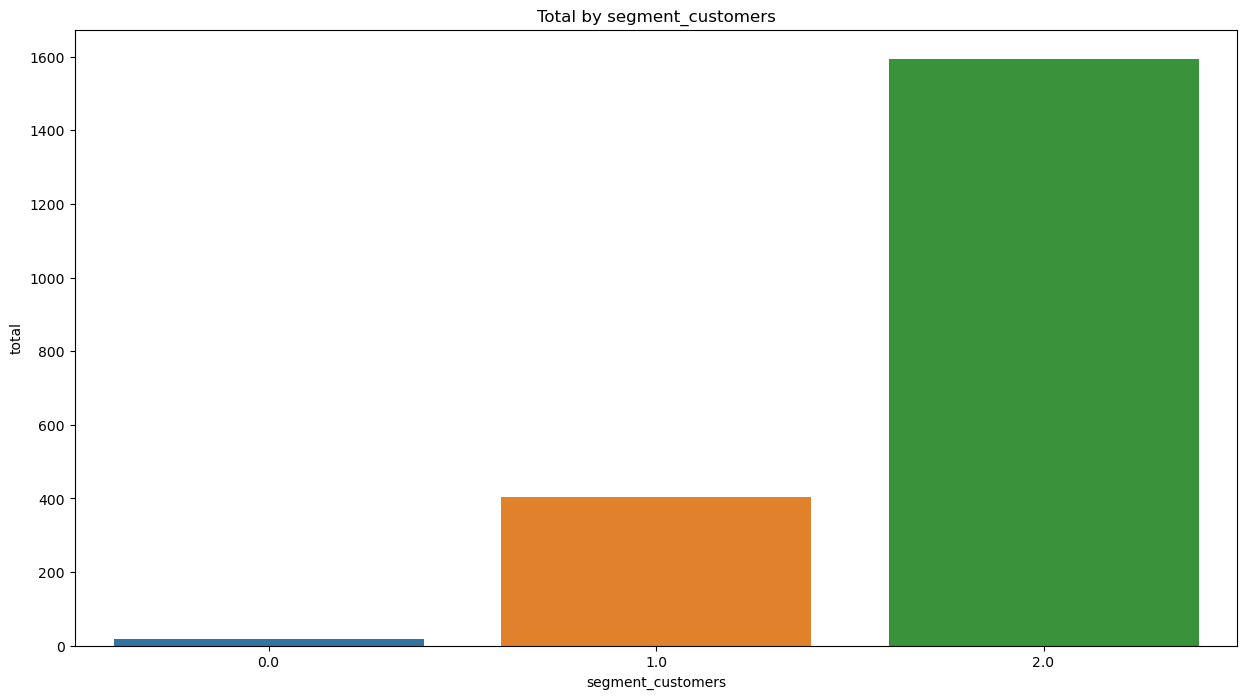

In [96]:
# Now, we can use Seaborn to plot the total by cluster
revenue1=data1.groupby(['segment_customers'])['total'].mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='segment_customers', y='total', data=revenue1)
plt.xlabel('segment_customers')
plt.ylabel('total')
plt.title('Total by segment_customers')
plt.show()

lets check those customers :

In [97]:
segment1 =data1[data1['segment_customers'] == 1.0]
segment1

invoiceno stockcode                     description  quantity  \
65        536374     21258      VICTORIAN SEWING BOX LARGE        32   
173       536386     84880           WHITE WIRE EGG HOLDER        36   
174       536386    85099C  JUMBO  BAG BAROQUE BLACK WHITE       100   
175       536386    85099B         JUMBO BAG RED RETROSPOT       100   
176       536387     79321                   CHILLI LIGHTS       192   
...          ...       ...                             ...       ...   
523019    581457     23526           WALL ART DOG LICENCE        126   
523020    581457     23401   RUSTIC MIRROR WITH LACE HEART       126   
523021    581458     22197                  POPCORN HOLDER      1500   
523022    581459     22197                  POPCORN HOLDER      1200   
524621    581566     23404      HOME SWEET HOME BLACKBOARD       144   

               invoicedate  unitprice  customerid session_date month_year  \
65     2018-11-29 09:09:00      10.95     15100.0   2018-11-29 2018-11-01   
173    2018-11-29 09:57:00       4.95     16029.0   2018-11-29 2018-11-01   
174    2018-11-29 09:57:00       1.65     16029.0   2018-11-29 2018-11-01   
175    2018-11-29 09:57:00       1.65     16029.0   2018-11-29 2018-11-01   
176    2018-11-29 09:58:00       3.82     16029.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
523019 2019-12-06 18:43:00       3.90     18102.0   2019-12-06 2019-12-01   
523020 2019-12-06 18:43:00       4.15     18102.0   2019-12-06 2019-12-01   
523021 2019-12-06 18:45:00       0.72     17949.0   2019-12-06 2019-12-01   
523022 2019-12-06 18:46:00       0.72     17949.0   2019-12-06 2019-12-01   
524621 2019-12-07 11:50:00       3.26     18102.0   2019-12-07 2019-12-01   

          total  cluster        mean  segment_customers  
65       350.40        0  292.000000                1.0  
173      178.20        0  302.950375                1.0  
174      165.00        2  302.950375                1.0  
175      165.00        2  302.950375                1.0  
176      733.44        0  302.950375                1.0  
...         ...      ...         ...                ...  
523019   491.40        0  544.284976                1.0  
523020   522.90        0  544.284976                1.0  
523021  1080.00        0  749.704118                1.0  
523022   864.00        0  749.704118                1.0  
524621   469.44        0  544.284976                1.0  

[2236 rows x 13 columns]

In [98]:
segment1['total'].agg(['min', 'max'])

min       3.25
max    2959.44
Name: total, dtype: float64

In [99]:
segment2 =data1[data1['segment_customers'] == 2.0]
segment2

invoiceno stockcode                      description  quantity  \
42857     540175     79321                    CHILLI LIGHTS       480   
155173    550461    47556B             TEA TIME TEA TOWELS       1300   
271432    561397     23122           PARTY CHARMS 50 PIECES       576   
271433    561397     79321                    CHILLI LIGHTS       480   
332318    566927         M                           Manual         1   
473257    577852     79321                    CHILLI LIGHTS       480   
516845    581105     85152  HAND OVER THE CHOCOLATE   SIGN        620   
516846    581105     22457  NATURAL SLATE HEART CHALKBOARD        620   
516847    581105     22727        ALARM CLOCK BAKELIKE RED        620   
516848    581105     23497     CLASSIC CHROME BICYCLE BELL        620   
516849    581105     23498           CLASSIC BICYCLE CLIPS        620   
516850    581105     22961           JAM MAKING SET PRINTED       620   
516851    581105     23552     BICYCLE PUNCTURE REPAIR KIT        620   
516852    581107     23461            SWEETHEART BIRD HOUSE       620   
516862    581110     23486         ANTIQUE HEART SHELF UNIT       150   

               invoicedate  unitprice  customerid session_date month_year  \
42857  2019-01-03 12:37:00       3.98     16532.0   2019-01-03 2019-01-01   
155173 2019-04-16 13:20:00       2.10     15749.0   2019-04-16 2019-04-01   
271432 2019-07-25 10:41:00       0.65     16532.0   2019-07-25 2019-07-01   
271433 2019-07-25 10:41:00       4.65     16532.0   2019-07-25 2019-07-01   
332318 2019-09-13 15:20:00    2033.10     17846.0   2019-09-13 2019-09-01   
473257 2019-11-20 11:08:00       4.65     16532.0   2019-11-20 2019-11-01   
516845 2019-12-05 12:14:00       1.92     16000.0   2019-12-05 2019-12-01   
516846 2019-12-05 12:14:00       2.55     16000.0   2019-12-05 2019-12-01   
516847 2019-12-05 12:14:00       2.99     16000.0   2019-12-05 2019-12-01   
516848 2019-12-05 12:14:00       1.38     16000.0   2019-12-05 2019-12-01   
516849 2019-12-05 12:14:00       1.38     16000.0   2019-12-05 2019-12-01   
516850 2019-12-05 12:14:00       1.38     16000.0   2019-12-05 2019-12-01   
516851 2019-12-05 12:14:00       1.86     16000.0   2019-12-05 2019-12-01   
516852 2019-12-05 12:15:00       3.30     16000.0   2019-12-05 2019-12-01   
516862 2019-12-05 12:17:00      13.35     16000.0   2019-12-05 2019-12-01   

         total  cluster         mean  segment_customers  
42857   1910.4        0  1687.200000                2.0  
155173  2730.0        0  2730.000000                2.0  
271432   374.4        0  1687.200000                2.0  
271433  2232.0        0  1687.200000                2.0  
332318  2033.1        0  2033.100000                2.0  
473257  2232.0        0  1687.200000                2.0  
516845  1190.4        0  1377.077778                2.0  
516846  1581.0        0  1377.077778                2.0  
516847  1853.8        0  1377.077778                2.0  
516848   855.6        0  1377.077778                2.0  
516849   855.6        0  1377.077778                2.0  
516850   855.6        4  1377.077778                2.0  
516851  1153.2        0  1377.077778                2.0  
516852  2046.0        0  1377.077778                2.0  
516862  2002.5        0  1377.077778                2.0

In [100]:
segment2['total'].agg(['min', 'max'])

min     374.4
max    2730.0
Name: total, dtype: float64

In [101]:
segment0 =data1[data1['segment_customers'] == 0.0]
segment0

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524820    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524821    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524822    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524823    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524824    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
524820 2019-12-07 12:50:00       0.85     12680.0   2019-12-07 2019-12-01   
524821 2019-12-07 12:50:00       2.10     12680.0   2019-12-07 2019-12-01   
524822 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524823 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524824 2019-12-07 12:50:00       4.95     12680.0   2019-12-07 2019-12-01   

        total  cluster       mean  segment_customers  
0       15.30        0  18.152222                0.0  
1       20.34        0  18.152222                0.0  
2       22.00        0  18.152222                0.0  
3       20.34        0  18.152222                0.0  
4       20.34        0  18.152222                0.0  
...       ...      ...        ...                ...  
524820  10.20        0  16.592500                0.0  
524821  12.60        0  16.592500                0.0  
524822  16.60        0  16.592500                0.0  
524823  16.60        0  16.592500                0.0  
524824  14.85        4  16.592500                0.0  

[390396 rows x 13 columns]

In [102]:
segment0['total'].agg(['min', 'max'])

min       0.001
max    2978.400
Name: total, dtype: float64

In [103]:
segment0[segment0['total'] == 0.001]

invoiceno     stockcode                 description  quantity  \
151903    550193          PADS  PADS TO MATCH ALL CUSHIONS         1   
270137    561226          PADS  PADS TO MATCH ALL CUSHIONS         1   
348695    568200          PADS  PADS TO MATCH ALL CUSHIONS         1   
350512    568375  BANK CHARGES                Bank Charges         1   

               invoicedate  unitprice  customerid session_date month_year  \
151903 2019-04-13 09:27:00      0.001     13952.0   2019-04-13 2019-04-01   
270137 2019-07-24 10:13:00      0.001     15618.0   2019-07-24 2019-07-01   
348695 2019-09-23 14:58:00      0.001     16198.0   2019-09-23 2019-09-01   
350512 2019-09-24 17:01:00      0.001     13405.0   2019-09-24 2019-09-01   

        total  cluster       mean  segment_customers  
151903  0.001        0  23.730445                0.0  
270137  0.001        0  17.263356                0.0  
348695  0.001        0  26.712067                0.0  
350512  0.001        0  21.201889                0.0

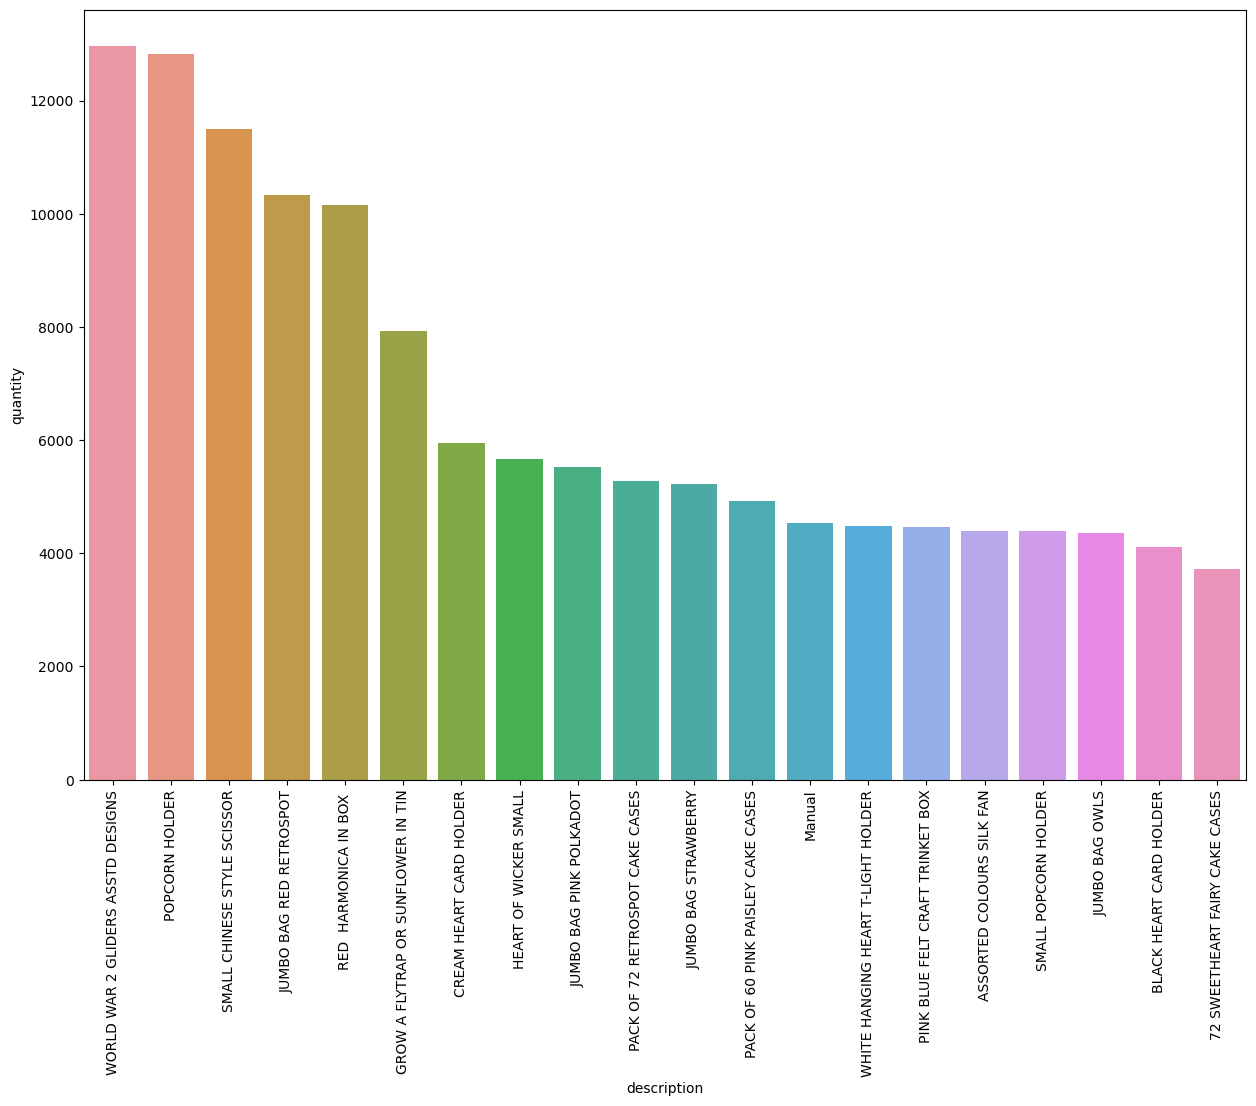

In [104]:
segment11 =segment1.groupby(['description',])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(20)

plt.figure(figsize=(15, 10))
sns.barplot(x='description', y='quantity', data=segment11)
plt.xticks(rotation=90)
plt.show()

* **search for seasonal period that we had a peek in total purchase.**

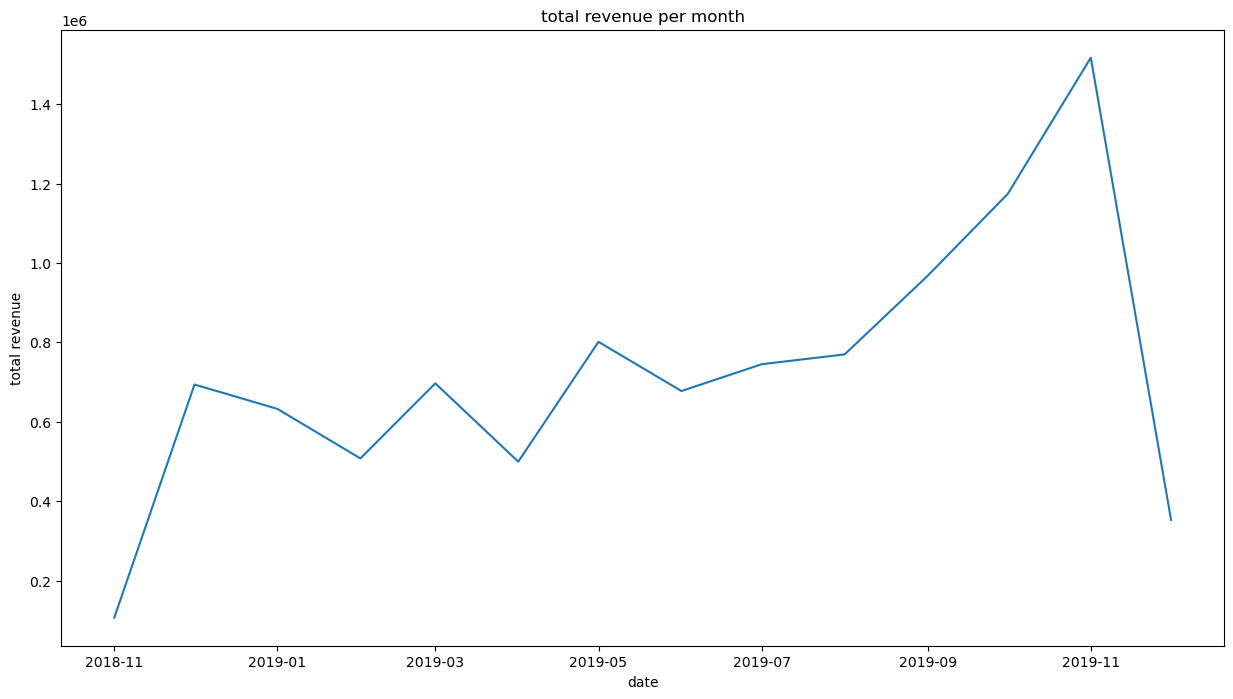

In [105]:
revenue=data1.groupby(['month_year'])['total'].sum().reset_index().sort_values(by='month_year')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=revenue, x ='month_year', y='total')

#specfiy axis labels
ax.set(xlabel='date',
       ylabel='total revenue',
       title='total revenue per month')
plt.show()

**In general, the sales act very well, we can see the revenue rises throughout the year. we can see a little down in February and April but after that, we can see a peak in September, October and November**

* **check what the most common shopping cart consist of**

In [106]:
new = data1[data1['invoiceno'].duplicated(keep=False)]
new.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid session_date month_year  total  \
0 2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01  15.30   
1 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
2 2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01  22.00   
3 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
4 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   

   cluster       mean  segment_customers  
0        0  18.152222                0.0  
1        0  18.152222                0.0  
2        0  18.152222                0.0  
3        0  18.152222                0.0  
4        0  18.152222                0.0

In [107]:
new['bundled_products']=new.groupby('invoiceno')['description'].transform(lambda x: ','.join(x))
new.head()

C:\Users\Alar\AppData\Local\Temp\ipykernel_5412\405407461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['bundled_products']=new.groupby('invoiceno')['description'].transform(lambda x: ','.join(x))


invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid session_date month_year  total  \
0 2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01  15.30   
1 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
2 2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01  22.00   
3 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   
4 2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01  20.34   

   cluster       mean  segment_customers  \
0        0  18.152222                0.0   
1        0  18.152222                0.0   
2        0  18.152222                0.0   
3        0  18.152222                0.0   
4        0  18.152222                0.0   

                                    bundled_products  
0  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...  
1  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...  
2  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...  
3  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...  
4  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...

In [108]:
new = new[['invoiceno','bundled_products']].drop_duplicates()
new

invoiceno                                   bundled_products
0         536365  WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL...
7         536366   HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT
9         536367  ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS...
21        536368  JAM MAKING SET WITH JARS,RED COAT RACK PARIS F...
26        536370  ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE...
...          ...                                                ...
524781    581583  LUNCH BAG RED RETROSPOT,6 CHOCOLATE LOVE HEART...
524783    581584  RED FLOCK LOVE HEART PHOTO FRAME,6 CHOCOLATE L...
524785    581585  BLACK TEA TOWEL CLASSIC DESIGN,ASSORTED BOTTLE...
524806    581586  LARGE CAKE STAND  HANGING STRAWBERY,SET OF 3 H...
524810    581587  CIRCUS PARADE LUNCH BOX ,PLASTERS IN TIN CIRCU...

[18326 rows x 2 columns]

In [109]:
count = Counter()

for row in new['bundled_products']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('KEY FOB ', 'KEY FOB '), 779),
 (('KEY FOB ', ' BACK DOOR '), 574),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 541),
 (('KEY FOB ', ' SHED'), 537),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  485),
 (('KEY FOB ', ' FRONT  DOOR '), 470),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 465),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 460),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 453),
 (('COFFEE', 'SUGAR'), 442)]

most common shopping cart:




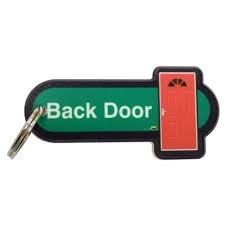

interesting, people tend to buy the same product twice in the same purchase.
574 times the customers has bought this most common products 'KEY FOB ', ' BACK DOOR '. 

# Formulate and test statistical hypotheses

* do the data show that the 80/20 “rule” perfectly apply to products in this dataset?<br>

In [110]:
pareto =data1.groupby("stockcode").agg({"total": "sum"}).sort_values("total", ascending=False)
pareto.reset_index(inplace=True)
pareto

stockcode       total
0          DOT  201743.600
1        22423  174156.540
2        47566   99445.230
3       85099B   94159.810
4       85123A   88462.450
...        ...         ...
3915     90084       0.850
3916     21268       0.840
3917    51014c       0.830
3918     84227       0.420
3919      PADS       0.003

[3920 rows x 2 columns]

In [111]:
pareto['total'].sum()

10141902.434000002

In [112]:
pareto['sum_total'] = pareto.total.cumsum()
pareto

stockcode       total     sum_total
0          DOT  201743.600  2.017436e+05
1        22423  174156.540  3.759001e+05
2        47566   99445.230  4.753454e+05
3       85099B   94159.810  5.695052e+05
4       85123A   88462.450  6.579676e+05
...        ...         ...           ...
3915     90084       0.850  1.014190e+07
3916     21268       0.840  1.014190e+07
3917    51014c       0.830  1.014190e+07
3918     84227       0.420  1.014190e+07
3919      PADS       0.003  1.014190e+07

[3920 rows x 3 columns]

In [113]:
#Describe a Threshold
threshold = pareto["total"].sum() * 0.80
threshold

8113521.947200002

In [114]:
#Find products that make up 80% revenue.
product80 = pareto[pareto['sum_total'] <= threshold]

product80

stockcode      total   sum_total
0         DOT  201743.60   201743.60
1       22423  174156.54   375900.14
2       47566   99445.23   475345.37
3      85099B   94159.81   569505.18
4      85123A   88462.45   657967.63
..        ...        ...         ...
825     22224    2764.06  8099843.80
826     21109    2763.20  8102607.00
827     23190    2761.90  8105368.90
828     22925    2757.47  8108126.37
829     22196    2754.16  8110880.53

[830 rows x 3 columns]

In [115]:
product80['stockcode'].nunique()

830

In [116]:
product80['stockcode'].nunique()/pareto['stockcode'].nunique()

0.21173469387755103

These products are 21% of all products.

In [117]:
def ABC_categories(row):
    totalsum = row['sum_total']

    if totalsum < threshold: 
        return 'A'
    else:
        return 'B' 

In [118]:
# Creating column with categories
pareto['AB_group']= pareto.apply(ABC_categories, axis=1)

In [119]:
pareto.sort_values("total", ascending=False)
pareto

stockcode       total     sum_total AB_group
0          DOT  201743.600  2.017436e+05        A
1        22423  174156.540  3.759001e+05        A
2        47566   99445.230  4.753454e+05        A
3       85099B   94159.810  5.695052e+05        A
4       85123A   88462.450  6.579676e+05        A
...        ...         ...           ...      ...
3915     90084       0.850  1.014190e+07        B
3916     21268       0.840  1.014190e+07        B
3917    51014c       0.830  1.014190e+07        B
3918     84227       0.420  1.014190e+07        B
3919      PADS       0.003  1.014190e+07        B

[3920 rows x 4 columns]

* **is there any seasonal perieod that we should pay attention to it the next year?**

In [120]:
datadate = data1.groupby(data1.month_year.dt.month)['total'].sum().reset_index()
datadate

month_year        total
0            1   632410.980
1            2   507750.810
2            3   696766.280
3            4   499555.061
4            5   801325.350
5            6   677422.540
6            7   744960.871
7            8   769748.860
8            9   967585.092
9           10  1174384.760
10          11  1623448.820
11          12  1046543.010

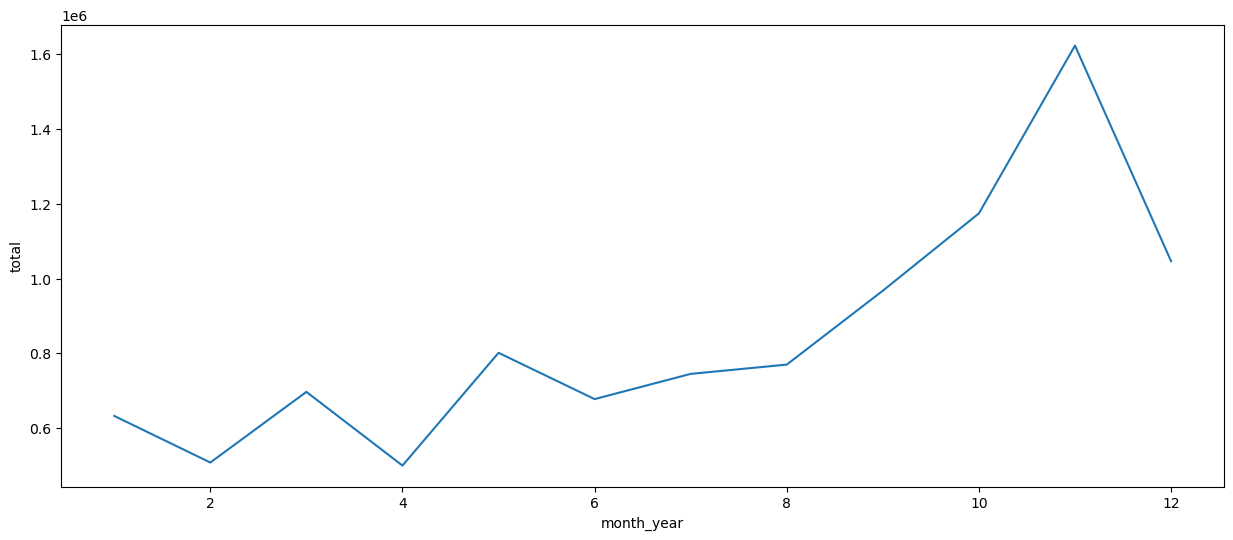

In [121]:
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='total',data=datadate)
plt.show()

as we saw before november december is the strongest month sales, maybe it's because christmas time

* **do we need to check and foucs more on the 'weak' products in the store?**

here we should look for the product that make the least amount of money and for the most returned items - these our weakness:

In [122]:
total_cluster = data1[['cluster', 'total']].groupby(['cluster']).sum().reset_index().sort_values(by='total')
total_cluster

cluster        total
1        1   326603.770
3        3   478691.480
2        2   989409.660
4        4  1120832.600
0        0  7226364.924

In [123]:
c2 = data1[data1['cluster']==2]
c2.sample(5)

invoiceno stockcode                  description  quantity  \
452848    576364     23581       JUMBO BAG PAISLEY PARK         3   
440048    575583     20727      LUNCH BAG  BLACK SKULL.         2   
305714    564733     20727      LUNCH BAG  BLACK SKULL.         5   
225174    557324     20718    RED RETROSPOT SHOPPER BAG         2   
63568     541696     22348  TEA BAG PLATE RED RETROSPOT         1   

               invoicedate  unitprice  customerid session_date month_year  \
452848 2019-11-12 17:40:00       2.08     15009.0   2019-11-12 2019-11-01   
440048 2019-11-08 11:55:00       1.65     14456.0   2019-11-08 2019-11-01   
305714 2019-08-26 13:18:00       1.65     17841.0   2019-08-26 2019-08-01   
225174 2019-06-18 09:41:00       2.46         NaN   2019-06-18 2019-06-01   
63568  2019-01-18 18:08:00       1.63         NaN   2019-01-18 2019-01-01   

        total  cluster      mean  segment_customers  
452848   6.24        2  6.996833                0.0  
440048   3.30        2  3.186146                0.0  
305714   8.25        2  5.278770                0.0  
225174   4.92        2       NaN                NaN  
63568    1.63        2       NaN                NaN

In [124]:
c2['unitprice'].agg(['min', 'max'])

min     0.42
max    59.53
Name: unitprice, dtype: float64

In [125]:
c2['quantity'].agg(['min', 'max'])

min       1
max    1500
Name: quantity, dtype: int64

this category has cheap items, 

i think those are cheap products and it's looks hard to profit from them the price range between 0.42 and 59.53 
we should look at the returned items 

In [126]:
invoicenoc.sample(20)

invoiceno stockcode                        description  quantity  \
297536   C562952     23169           CLASSIC GLASS COOKIE JAR        -1   
110161   C545677     22624               IVORY KITCHEN SCALES        -4   
270078   C560540     23203          JUMBO BAG DOILEY PATTERNS        -1   
214897   C555636     22684      FRENCH BLUE METAL DOOR SIGN 9       -10   
197000   C553880     22464        HANGING METAL HEART LANTERN       -72   
252194   C559079     21927   BLUE/CREAM STRIPE CUSHION COVER         -1   
96387    C544557     85150      LADIES & GENTLEMEN METAL SIGN        -1   
330769   C565925      POST                            POSTAGE        -1   
531418   C580954    84997B   CHILDRENS CUTLERY RETROSPOT RED         -6   
282999   C561684     22725     ALARM CLOCK BAKELIKE CHOCOLATE        -1   
363719   C568575    85034A    3 GARDENIA MORRIS BOXED CANDLES        -2   
235950   C557663     21121  SET/10 RED POLKADOT PARTY CANDLES       -24   
341725   C566777     22842            BISCUIT TIN VINTAGE RED        -1   
382693   C569941     23412         HEART MIRROR ANTIQUE WHITE        -2   
70653    C542091     22442     GROW YOUR OWN FLOWERS SET OF 3        -1   
349874   C567541     20932              PINK POT PLANT CANDLE        -9   
47474    C540417     22352  LUNCH BOX WITH CUTLERY RETROSPOT         -6   
421501   C572991     23166     MEDIUM CERAMIC TOP STORAGE JAR        -1   
331039   C565962     21927   BLUE/CREAM STRIPE CUSHION COVER         -3   
77929    C542793     22111       SCOTTIE DOG HOT WATER BOTTLE       -72   

               invoicedate  unitprice  customerid session_date month_year  \
297536 2019-08-09 10:10:00       4.15     12749.0   2019-08-09 2019-08-01   
110161 2019-03-04 10:48:00       7.65     14543.0   2019-03-04 2019-03-01   
270078 2019-07-17 12:26:00       2.08     12415.0   2019-07-17 2019-07-01   
214897 2019-06-04 12:33:00       1.25     15073.0   2019-06-04 2019-06-01   
197000 2019-05-17 15:23:00       1.45     13762.0   2019-05-17 2019-05-01   
252194 2019-07-04 10:44:00       1.25     17841.0   2019-07-04 2019-07-01   
96387  2019-02-19 12:31:00       2.55     17422.0   2019-02-19 2019-02-01   
330769 2019-09-06 10:02:00      18.00     12471.0   2019-09-06 2019-09-01   
531418 2019-12-04 14:19:00       3.75     12967.0   2019-12-04 2019-12-01   
282999 2019-07-26 19:36:00       3.75     13136.0   2019-07-26 2019-07-01   
363719 2019-09-26 09:22:00       4.25     13134.0   2019-09-26 2019-09-01   
235950 2019-06-19 17:59:00       1.25         NaN   2019-06-19 2019-06-01   
341725 2019-09-13 09:55:00       6.75     14911.0   2019-09-13 2019-09-01   
382693 2019-10-04 18:06:00       7.50     16909.0   2019-10-04 2019-10-01   
70653  2019-01-23 12:41:00       7.95     17091.0   2019-01-23 2019-01-01   
349874 2019-09-19 10:15:00       2.95     15498.0   2019-09-19 2019-09-01   
47474  2019-01-05 10:56:00       2.55     13680.0   2019-01-05 2019-01-01   
421501 2019-10-25 10:56:00       1.25     17672.0   2019-10-25 2019-10-01   
331039 2019-09-06 11:25:00       1.25     14410.0   2019-09-06 2019-09-01   
77929  2019-01-30 10:52:00       4.25     14113.0   2019-01-30 2019-01-01   

        total_loss  
297536       -4.15  
110161      -30.60  
270078       -2.08  
214897      -12.50  
197000     -104.40  
252194       -1.25  
96387        -2.55  
330769      -18.00  
531418      -22.50  
282999       -3.75  
363719       -8.50  
235950      -30.00  
341725       -6.75  
382693      -15.00  
70653        -7.95  
349874      -26.55  
47474       -15.30  
421501       -1.25  
331039       -3.75  
77929      -306.00

In [127]:
invoicenoc[invoicenoc['quantity'] < -3000]

invoiceno stockcode                          description  quantity  \
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
61624    C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
160145   C550456     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   

               invoicedate  unitprice  customerid session_date month_year  \
4287   2018-11-30 14:23:00       0.03     15838.0   2018-11-30 2018-11-01   
61624  2019-01-16 10:17:00       1.04     12346.0   2019-01-16 2019-01-01   
160145 2019-04-16 13:08:00       2.10     15749.0   2019-04-16 2019-04-01   
540422 2019-12-07 09:27:00       2.08     16446.0   2019-12-07 2019-12-01   

        total_loss  
4287        -280.8  
61624     -77183.6  
160145     -6539.4  
540422   -168469.6

In [128]:
invoicenoc = invoicenoc.drop(invoicenoc.index[invoicenoc['quantity'] < -3000])

In [129]:
returned =invoicenoc.groupby(['description'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=True).head(5)
returned

description  quantity
1093                              Manual     -4066
1887  WHITE HANGING HEART T-LIGHT HOLDER     -2578
711          GIN + TONIC DIET METAL SIGN     -2030
827                    HERB MARKER BASIL     -1527
619                 FELTCRAFT DOLL MOLLY     -1447

**as we said before, it's impossible to know what was returned, it's manual operation. but the other products has been returned more than 1000 part from each products, it's looks like the quality is not good or dameged**

* **do we need to work more in our relationship with specific segment of customers?**


In [130]:
segment0['total'].agg(['min', 'max'])

min       0.001
max    2978.400
Name: total, dtype: float64

**i recommend to work more to understand what more those customers looking for and what the things that are more interesting in because they are not active enough**

* **should we make bundled products that customers tend to buy them together?<**

In [131]:
count.most_common(5)

[(('KEY FOB ', 'KEY FOB '), 779),
 (('KEY FOB ', ' BACK DOOR '), 574),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 541),
 (('KEY FOB ', ' SHED'), 537),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  485)]

according to the previous section, i would recommend to sell KEY FOB in bundel, people would like to have a good deal for this product, also i would make a deal for KEY FOB and BACK DOOR together, we can sell more products in this way. 

# Matrics 

## 1.Pareto Chart for Products categories 

In [132]:
A = pareto.groupby('AB_group').agg(
    stockcode_num=('stockcode', 'nunique'),
    total=('total', 'sum')    
).reset_index().sort_values("total", ascending=False)

In [133]:
A

AB_group  stockcode_num        total
0        A            830  8110880.530
1        B           3090  2031021.904

In [134]:
A = A.sort_values(by='total', ascending=False)

In [135]:
A["cumpercentage"] = A["total"].cumsum()/A["total"].sum()*100

In [136]:
A["cumpercentageproduct"] = A["stockcode_num"].cumsum()/A["stockcode_num"].sum()*100

In [137]:
A

AB_group  stockcode_num        total  cumpercentage  cumpercentageproduct
0        A            830  8110880.530      79.973955             21.173469
1        B           3090  2031021.904     100.000000            100.000000

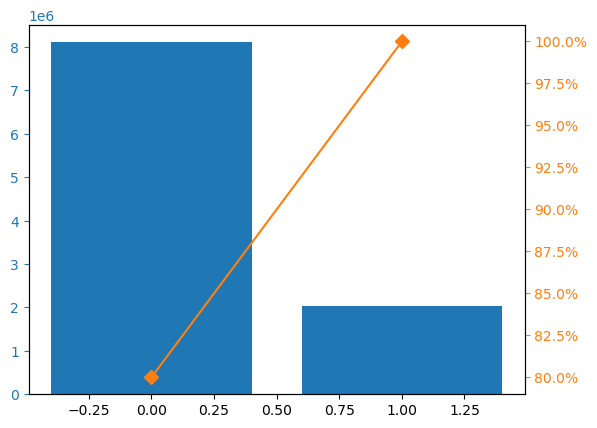

In [138]:

fig, ax = plt.subplots()
ax.bar(A.index, A["total"], color="C0")
ax2 = ax.twinx()
ax2.plot(A.index, A["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

**the x-axis displays the different group ordered from highest to lowest frequency.
the left-hand y-axis shows the frequency of each group and the right-hand y-axis shows the cumulative frequency of the group
we can see:
80% of revenue is from 20% of company products.**


In [139]:
revenue['Growth_Rate'] = revenue['total'].pct_change(periods=1) * 100
revenue

month_year        total  Growth_Rate
0  2018-11-01   106406.210          NaN
1  2018-12-01   693882.790   552.107419
2  2019-01-01   632410.980    -8.859106
3  2019-02-01   507750.810   -19.711892
4  2019-03-01   696766.280    37.226030
5  2019-04-01   499555.061   -28.303783
6  2019-05-01   801325.350    60.407813
7  2019-06-01   677422.540   -15.462235
8  2019-07-01   744960.871     9.969897
9  2019-08-01   769748.860     3.327422
10 2019-09-01   967585.092    25.701400
11 2019-10-01  1174384.760    21.372763
12 2019-11-01  1517042.610    29.177648
13 2019-12-01   352660.220   -76.753440

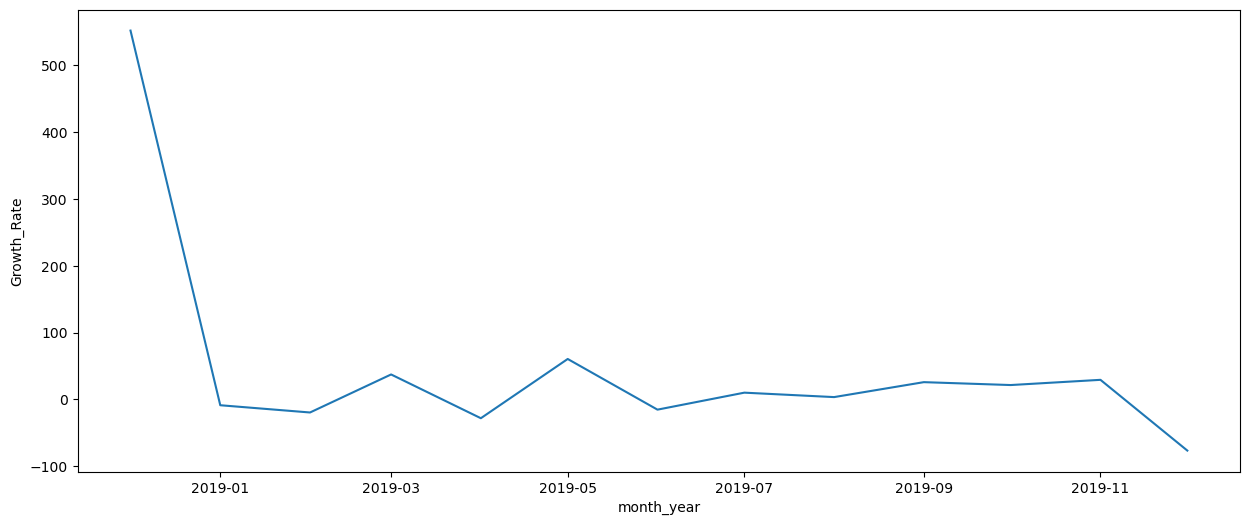

In [140]:
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='Growth_Rate',data=revenue)
plt.show()

**the highest growth rate was in May we had 60.407813 and then we had a drop in June but after that, we can see that the growth rate continues to rise.**

## 3.Revenue per category = total revenue for category / average category sold for period


In [141]:
data1

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524820    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524821    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524822    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524823    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524824    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
524820 2019-12-07 12:50:00       0.85     12680.0   2019-12-07 2019-12-01   
524821 2019-12-07 12:50:00       2.10     12680.0   2019-12-07 2019-12-01   
524822 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524823 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524824 2019-12-07 12:50:00       4.95     12680.0   2019-12-07 2019-12-01   

        total  cluster       mean  segment_customers  
0       15.30        0  18.152222                0.0  
1       20.34        0  18.152222                0.0  
2       22.00        0  18.152222                0.0  
3       20.34        0  18.152222                0.0  
4       20.34        0  18.152222                0.0  
...       ...      ...        ...                ...  
524820  10.20        0  16.592500                0.0  
524821  12.60        0  16.592500                0.0  
524822  16.60        0  16.592500                0.0  
524823  16.60        0  16.592500                0.0  
524824  14.85        4  16.592500                0.0  

[524825 rows x 13 columns]

In [142]:
Revenue_per_category = data1.groupby('cluster').agg(
    total=('total', 'sum'),
    quantity=('quantity', 'sum')
).reset_index().sort_values("total", ascending=False)
Revenue_per_category

cluster        total  quantity
0        0  7226364.924   3936447
4        4  1120832.600    522752
2        2   989409.660    530868
3        3   478691.480    308016
1        1   326603.770     66588

In [143]:
Revenue_per_category['revenue_per_category'] = Revenue_per_category['total'] / Revenue_per_category['quantity']

In [144]:
Revenue_per_category

cluster        total  quantity  revenue_per_category
0        0  7226364.924   3936447              1.835758
4        4  1120832.600    522752              2.144100
2        2   989409.660    530868              1.863758
3        3   478691.480    308016              1.554112
1        1   326603.770     66588              4.904844

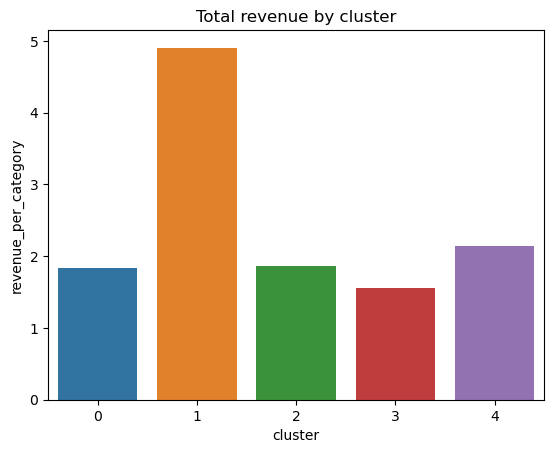

In [145]:
# Now, we can use Seaborn to plot the total by cluster
sns.barplot(x='cluster', y='revenue_per_category', data=Revenue_per_category)
plt.xlabel('cluster')
plt.ylabel('revenue_per_category')
plt.title('Total revenue by cluster')
plt.show()

**most profitable categories are 1 and 4. we can see according to the calculation those categories has high score**

## 4.What is the average purchase size?<br>

In [146]:
avg_check=data1.groupby(['customerid'])['total'].sum().reset_index()
fig = px.histogram(avg_check.query('total < 3000'), x="total")
fig.show()

the average common amount spent on products is between 100 - 200.

In [147]:
data1['transactions']=data1.groupby('session_date')['invoiceno'].transform('count')

In [148]:
data1

invoiceno stockcode                          description  quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524820    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
524821    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
524822    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
524823    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
524824    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               invoicedate  unitprice  customerid session_date month_year  \
0      2018-11-29 08:26:00       2.55     17850.0   2018-11-29 2018-11-01   
1      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
2      2018-11-29 08:26:00       2.75     17850.0   2018-11-29 2018-11-01   
3      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
4      2018-11-29 08:26:00       3.39     17850.0   2018-11-29 2018-11-01   
...                    ...        ...         ...          ...        ...   
524820 2019-12-07 12:50:00       0.85     12680.0   2019-12-07 2019-12-01   
524821 2019-12-07 12:50:00       2.10     12680.0   2019-12-07 2019-12-01   
524822 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524823 2019-12-07 12:50:00       4.15     12680.0   2019-12-07 2019-12-01   
524824 2019-12-07 12:50:00       4.95     12680.0   2019-12-07 2019-12-01   

        total  cluster       mean  segment_customers  transactions  
0       15.30        0  18.152222                0.0          3028  
1       20.34        0  18.152222                0.0          3028  
2       22.00        0  18.152222                0.0          3028  
3       20.34        0  18.152222                0.0          3028  
4       20.34        0  18.152222                0.0          3028  
...       ...      ...        ...                ...           ...  
524820  10.20        0  16.592500                0.0          1617  
524821  12.60        0  16.592500                0.0          1617  
524822  16.60        0  16.592500                0.0          1617  
524823  16.60        0  16.592500                0.0          1617  
524824  14.85        4  16.592500                0.0          1617  

[524825 rows x 14 columns]

In [149]:
from pathlib import Path  
filepath = Path('/Users/Alar/Downloads/data1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data1.to_csv(filepath)  

I saved the data to work on the dashboard

In [150]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524825 entries, 0 to 524824
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoiceno          524825 non-null  object        
 1   stockcode          524825 non-null  object        
 2   description        524825 non-null  object        
 3   quantity           524825 non-null  int64         
 4   invoicedate        524825 non-null  datetime64[ns]
 5   unitprice          524825 non-null  float64       
 6   customerid         392647 non-null  float64       
 7   session_date       524825 non-null  datetime64[ns]
 8   month_year         524825 non-null  datetime64[ns]
 9   total              524825 non-null  float64       
 10  cluster            524825 non-null  int32         
 11  mean               392647 non-null  float64       
 12  segment_customers  392647 non-null  float64       
 13  transactions       524825 non-null  int64   

# Reference :
https://www.blog.shippypro.com/en/the-importance-of-return-analysis-for-your-e-commerce
learned how to study the returned items <br>
https://www.investopedia.com/terms/p/pareto-analysis.asp
here i wanted to learn more about pareto law<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
i wanted to check if there is any correlation between the columns<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
i wanted to use this model to deal with the discription column<br>
https://www.optimove.com/resources/learning-center/customer-segmentation - helped me to understand how we should look at customers and based on what we should make the segmentaion <br>
https://www.statology.org/pareto-chart-python/ used to create a Pareto chart<br>
https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/ used to calculate the Cumulative percentage for pareto chart <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html used this method to find the percentage change<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html i saved the data to my computer by this way<br>

# Dashboard :
https://public.tableau.com/app/profile/alar.saad/viz/finalproject_16842672549470/Dashboard1?publish=yes

# presentation:
https://docs.google.com/presentation/d/12JOUdjxkLyWQjzS0JcJJOKTwM4-uwI9w/edit?usp=sharing&ouid=115839349225026534395&rtpof=true&sd=true

# Conclusion:
our data set includes data related to e-commerce websites over a year, each row in the database shows us the purchase of a product by a particular customer at a specific time. we have 4372 customers in our store.<br>
our purpose of this project was to analyze the products for that I categorized products into 5 categories we found that the most profitable categories are 0 and 2. we can see according to the calculation those categories has high score in revenue_per_category. and then we used Pareto law to see if our biggest sales come from individual products, and yes only 830 products are responsible for 8M, And the other 3090 products responsible for only 2m of our sales.<br>
in addition, we searched for a seasonal time when we have a peak in sales and we found that December is the strongest month.
but if we look at the growth rate the percentage shows high value in May, we had more than a 60% increase in sales.
